In [43]:
#%%
import math
import os
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation, PillowWriter
import numpy as np
import multiprocessing as mp
from PIL import Image
import imageio

path = r'/mnt/e/Data/JensenLab/20220608_1214_I1_100000frames_0.1_interferenceTest/data/intensity_images'

os.chdir(path)
files = os.listdir(path)

chunks = [files[x:x+1000] for x in range(0, len(files), 1000)]

def process_chunk(c):
    acc = np.zeros((512, 512))
    for f in c:
        acc += np.asarray(Image.open(f).convert('L'))
    return acc

res = None

with mp.Pool(8) as pool:
    res = pool.map(process_chunk, chunks)


Total number of frames 101


/tmp/ipykernel_822/663096834.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 20))


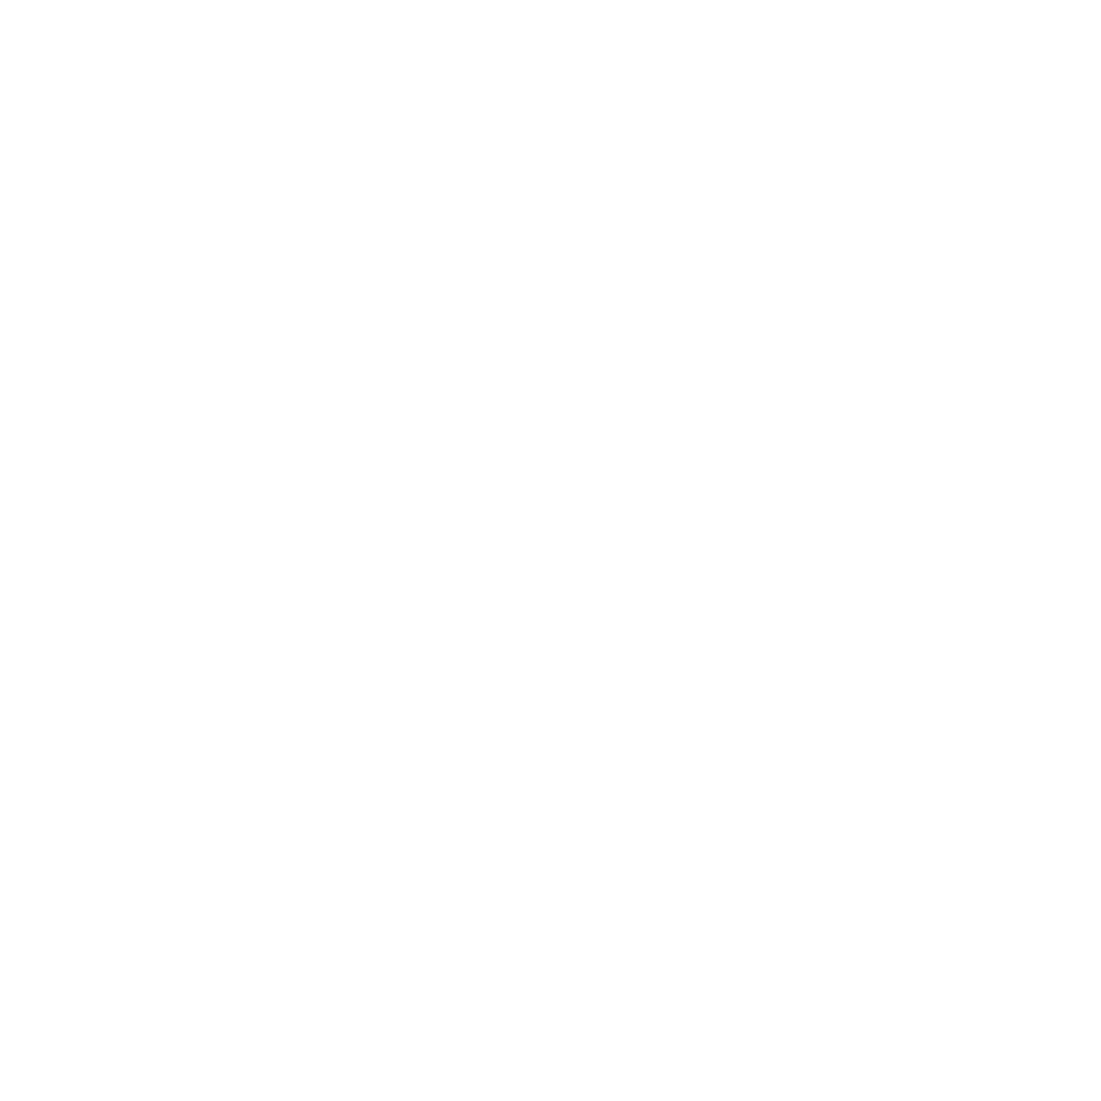

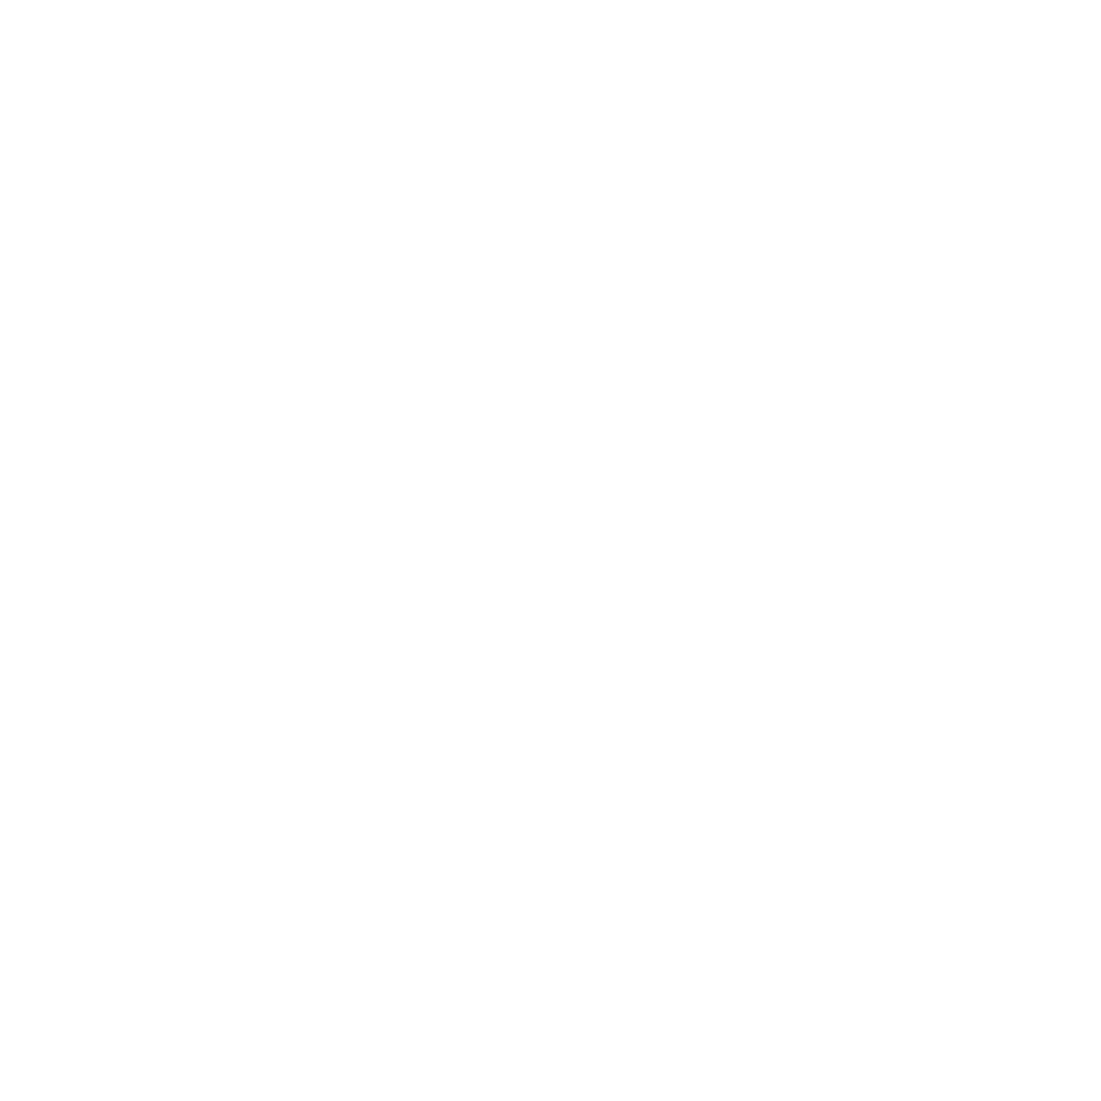

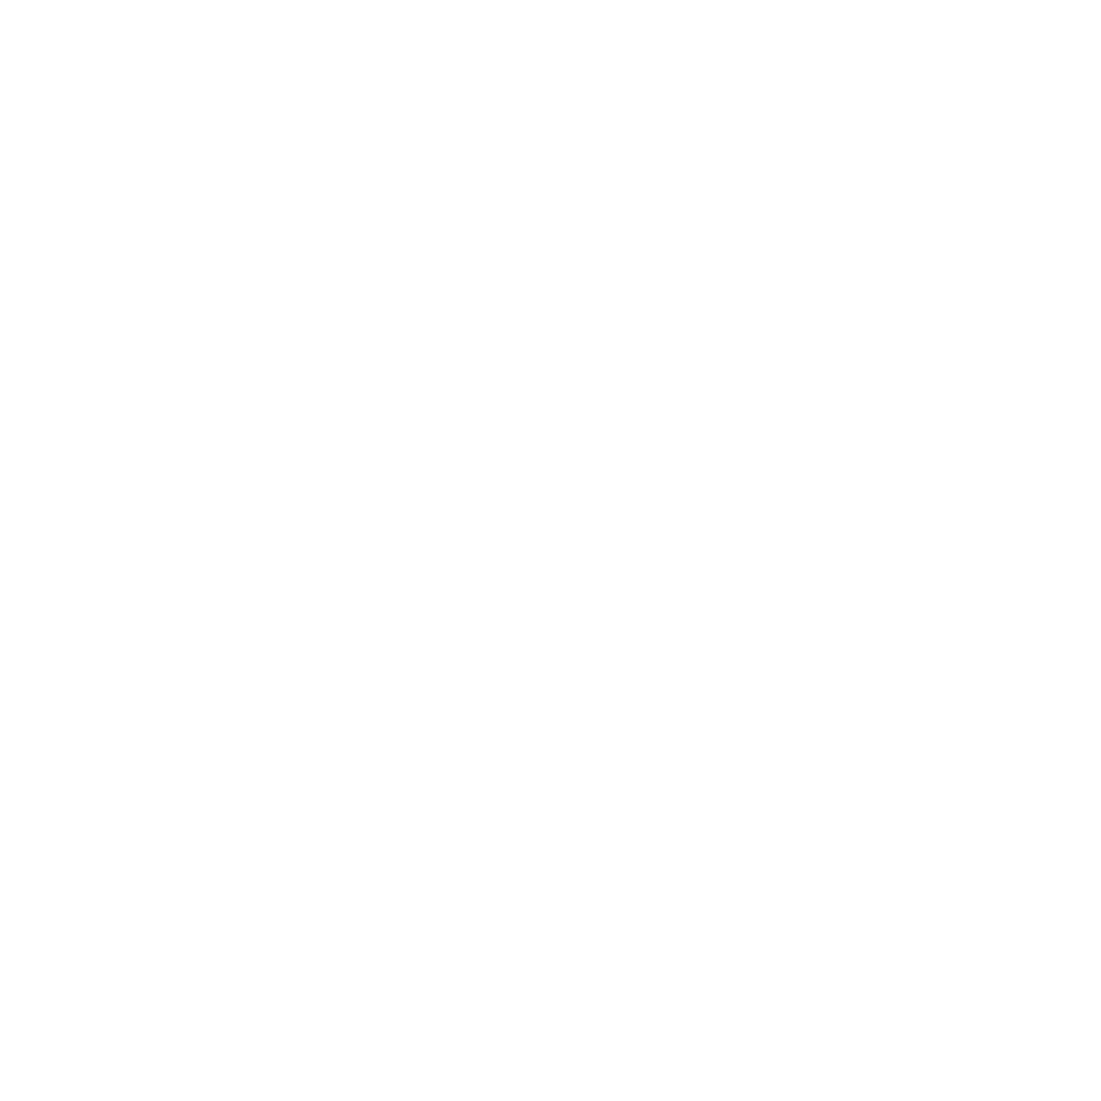

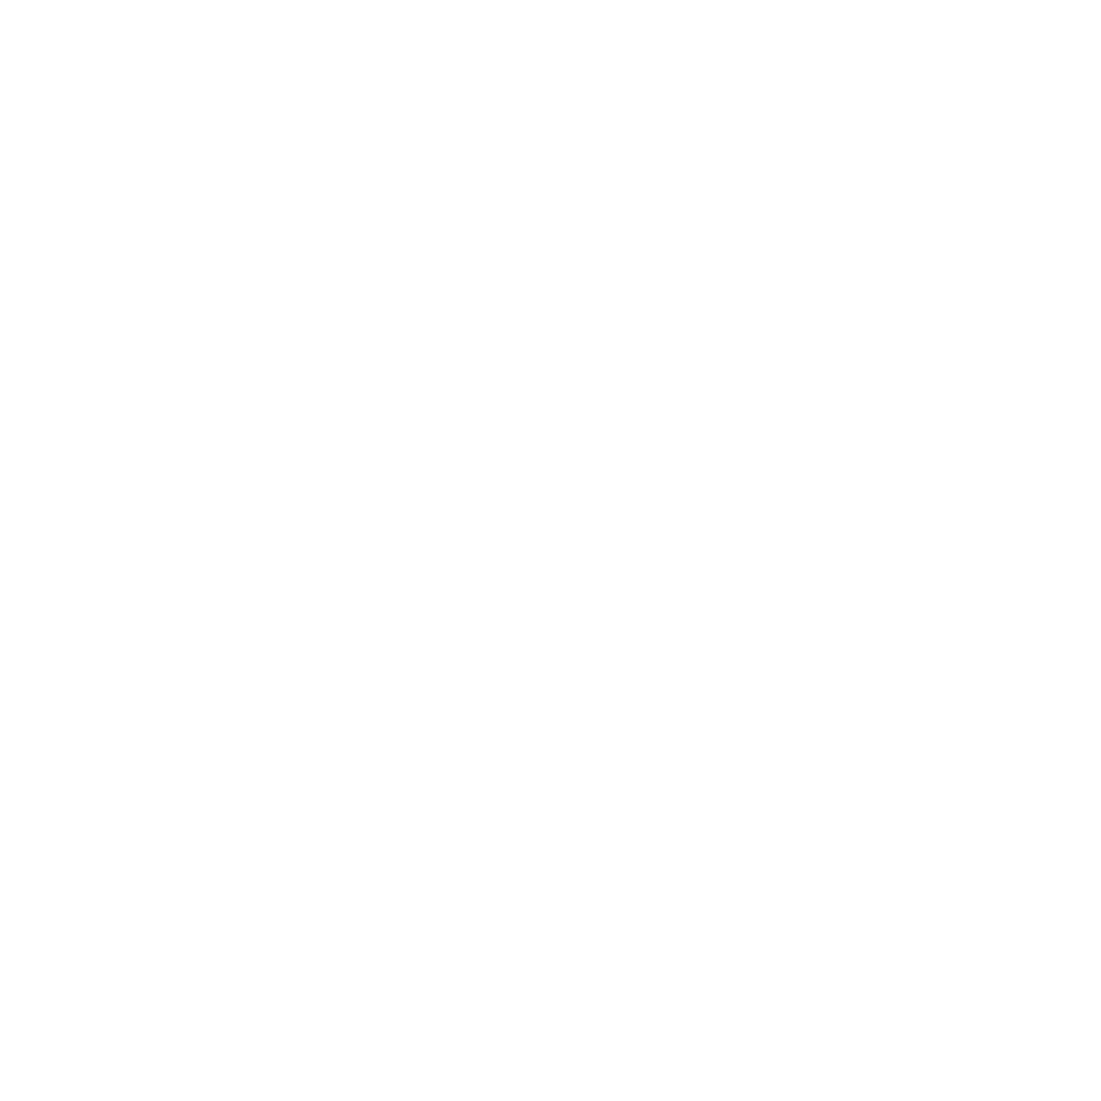

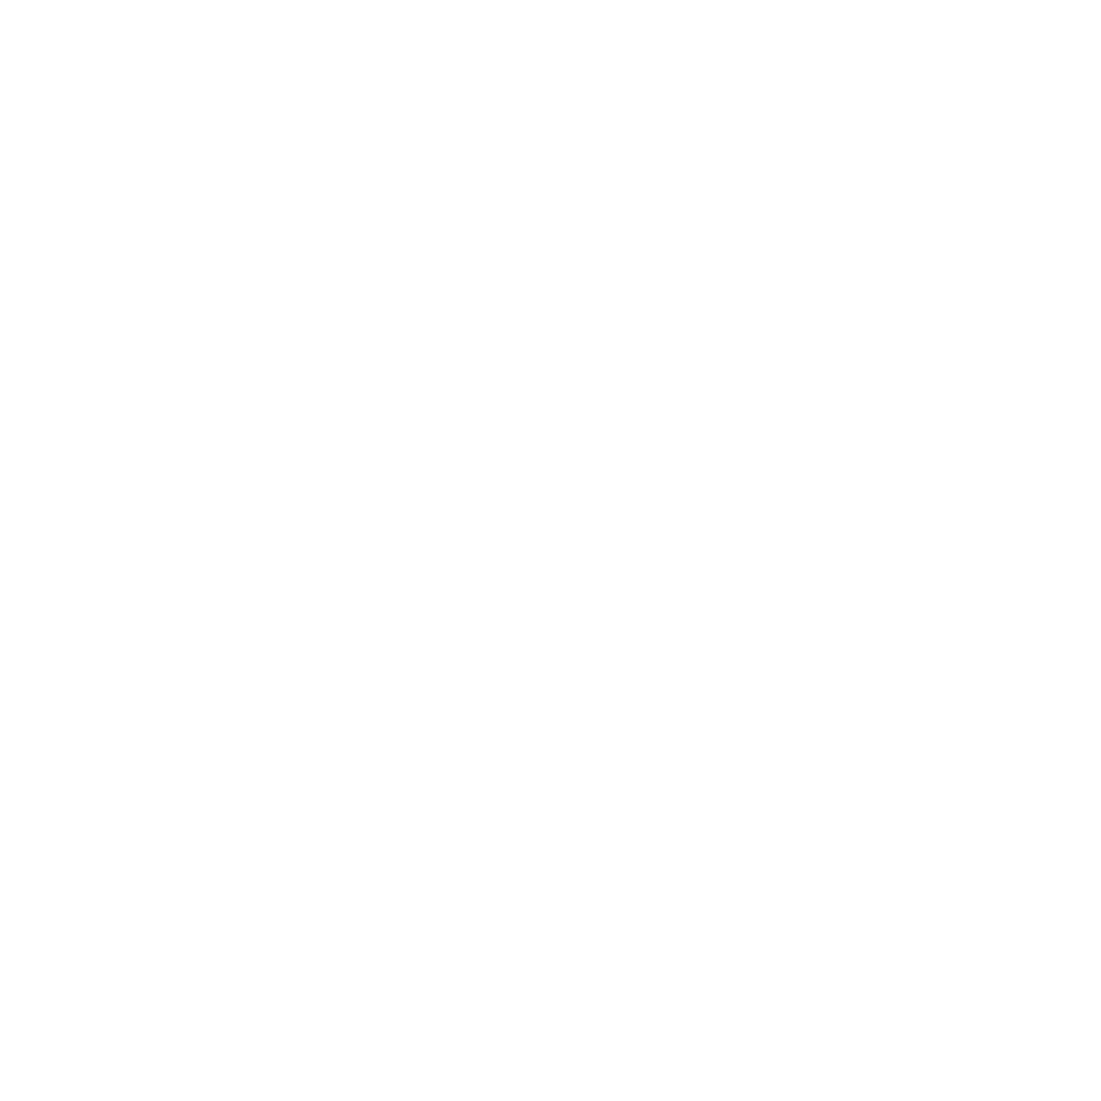

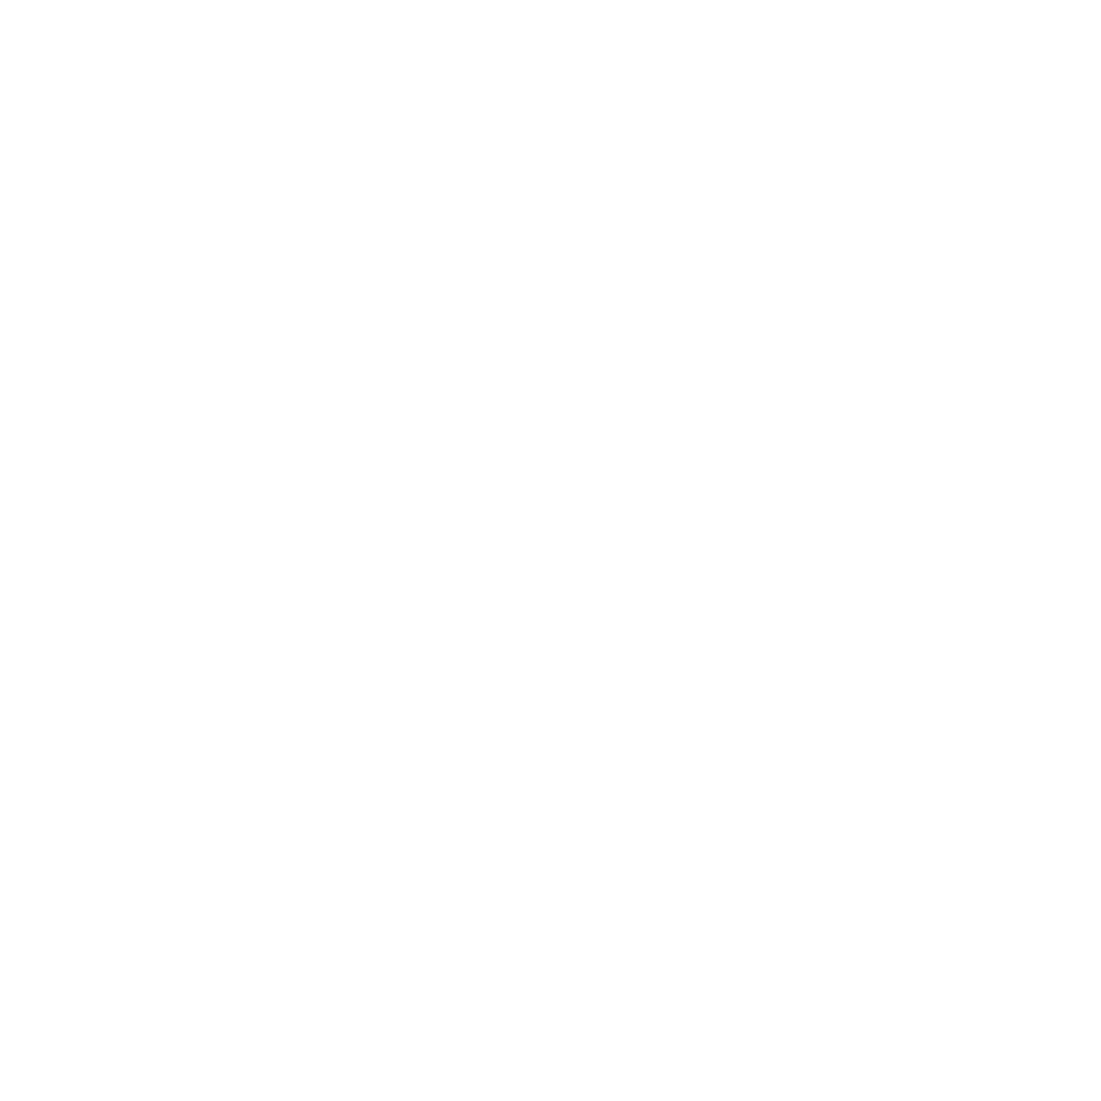

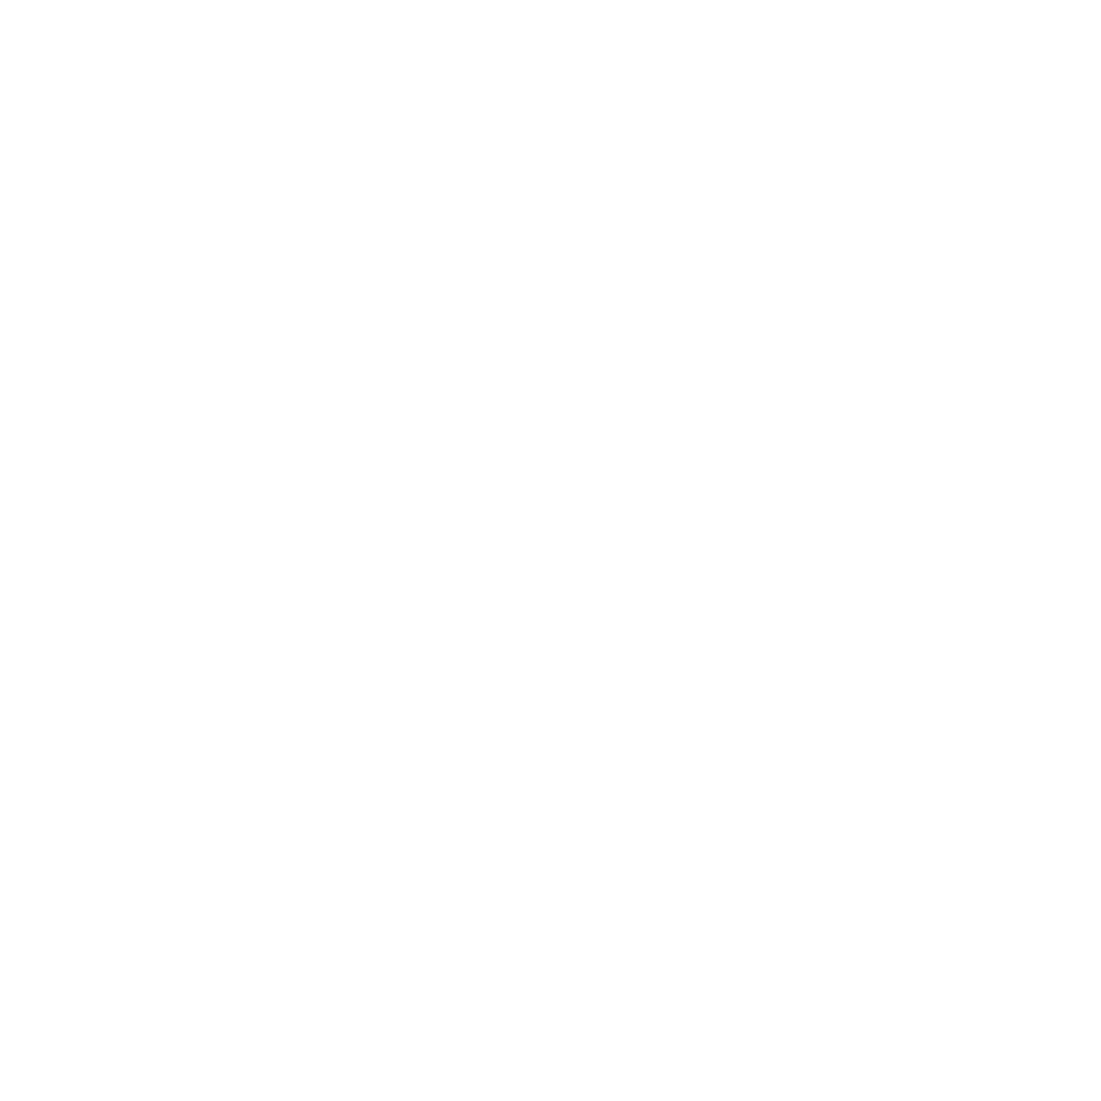

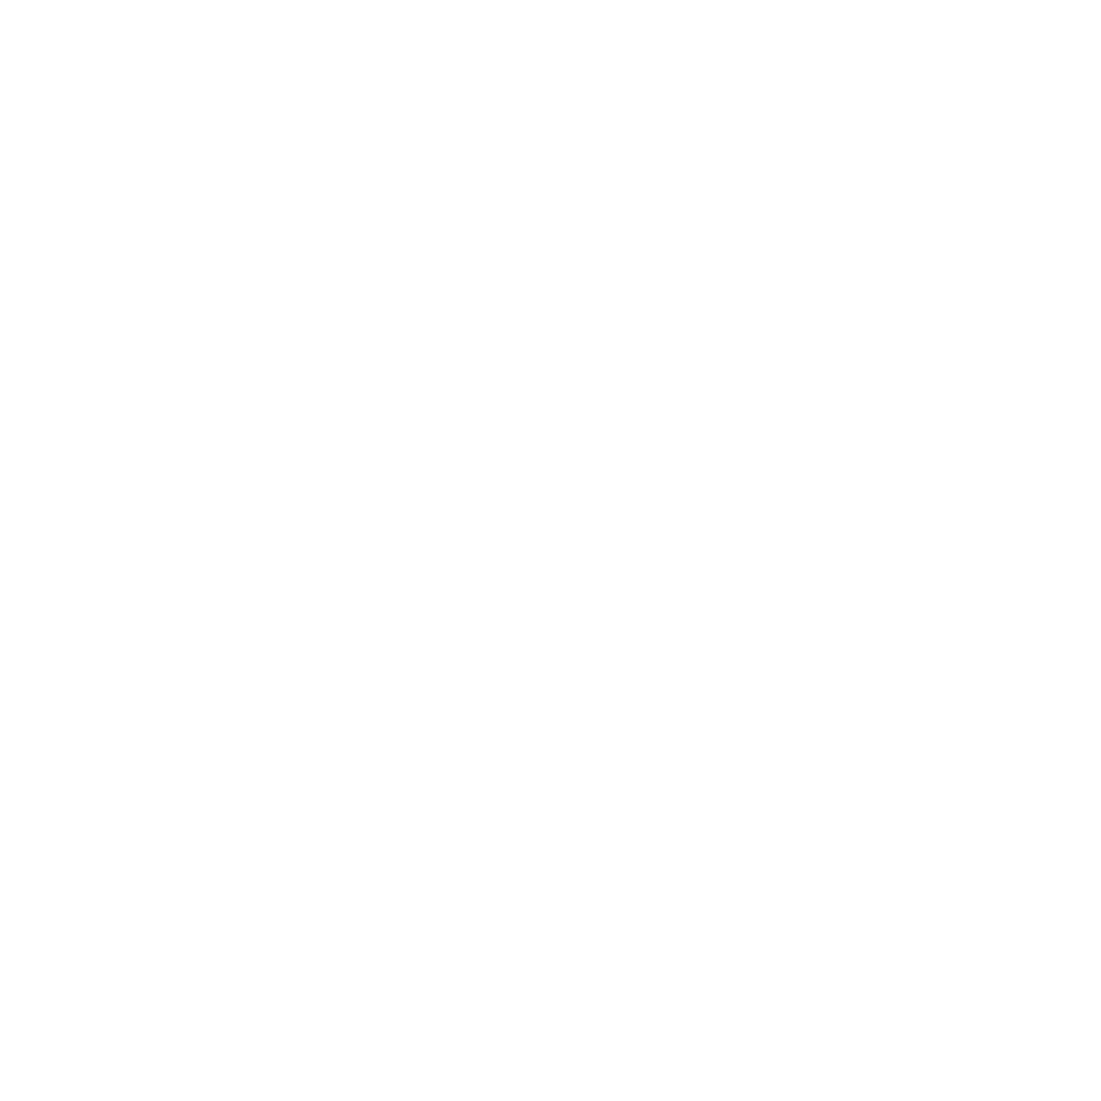

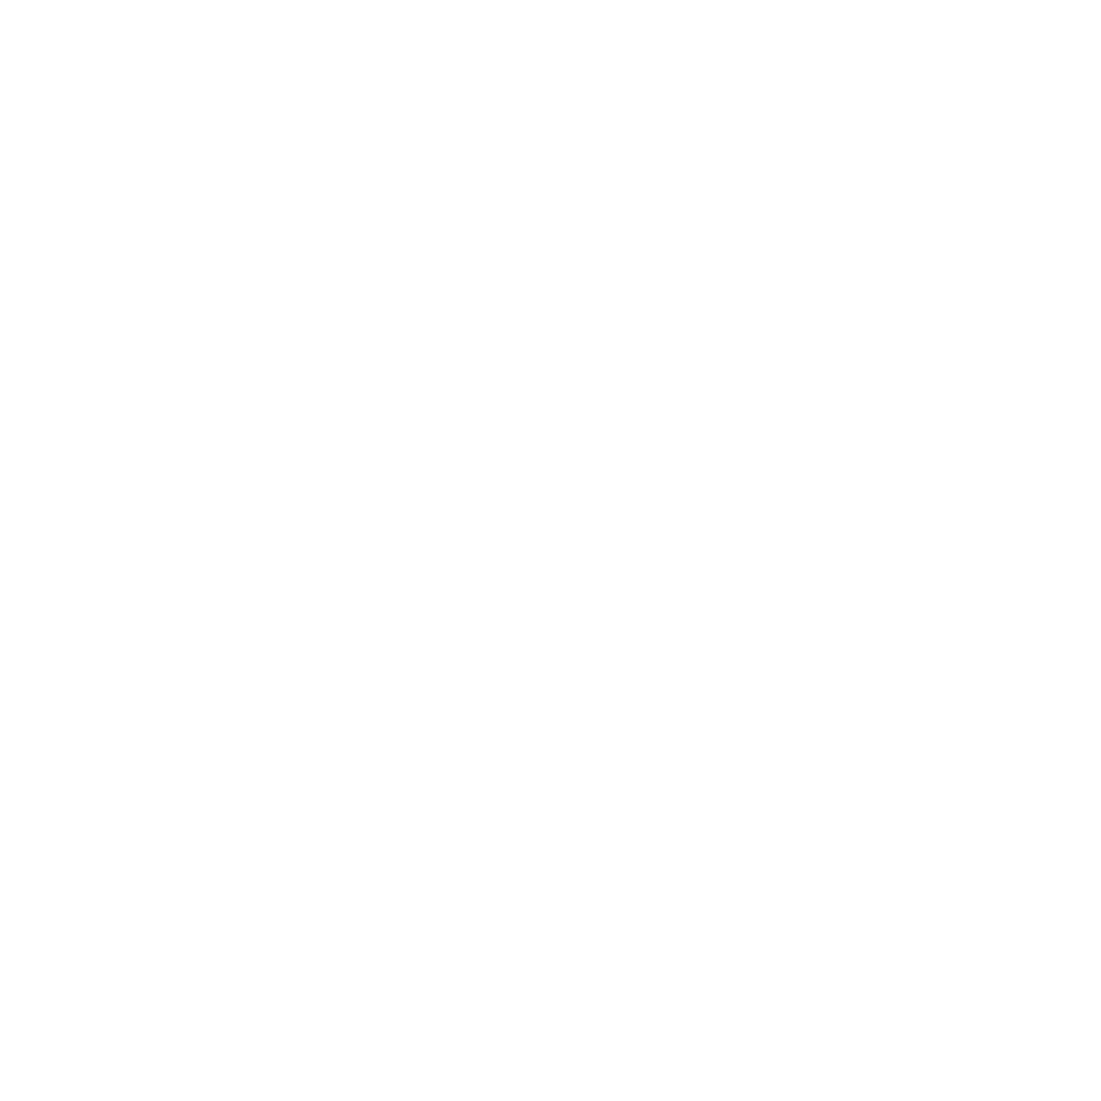

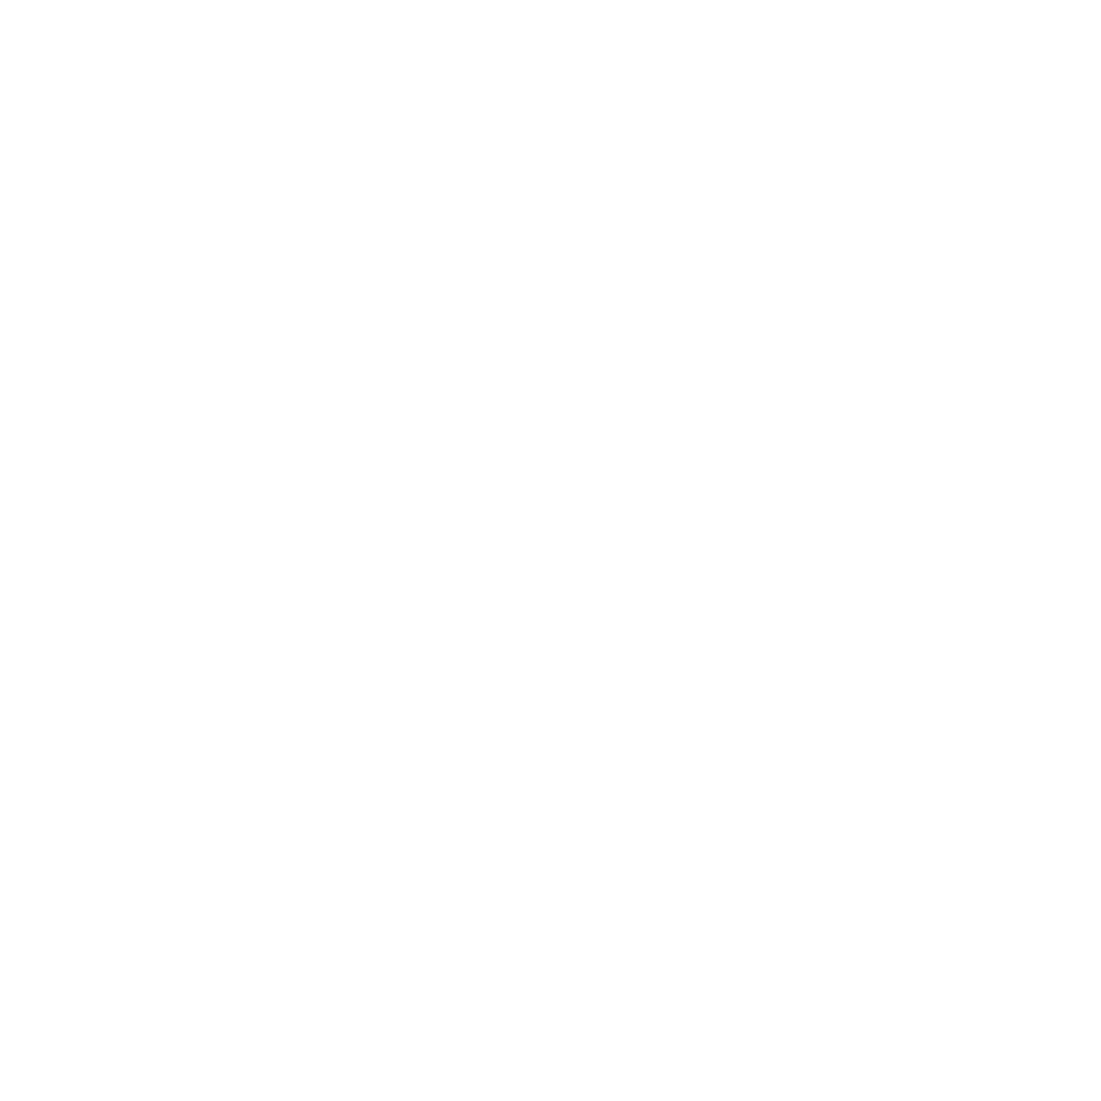

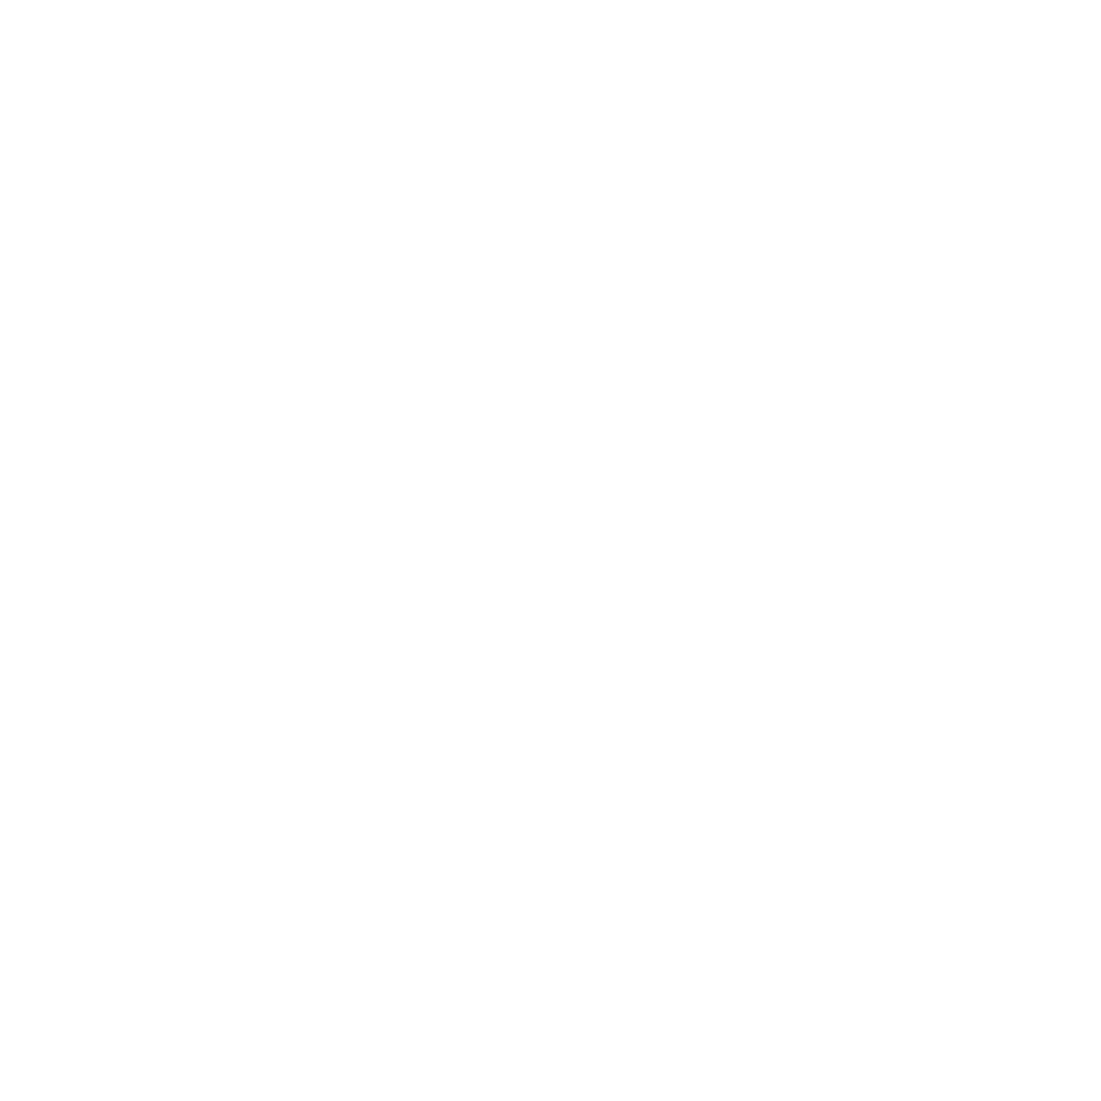

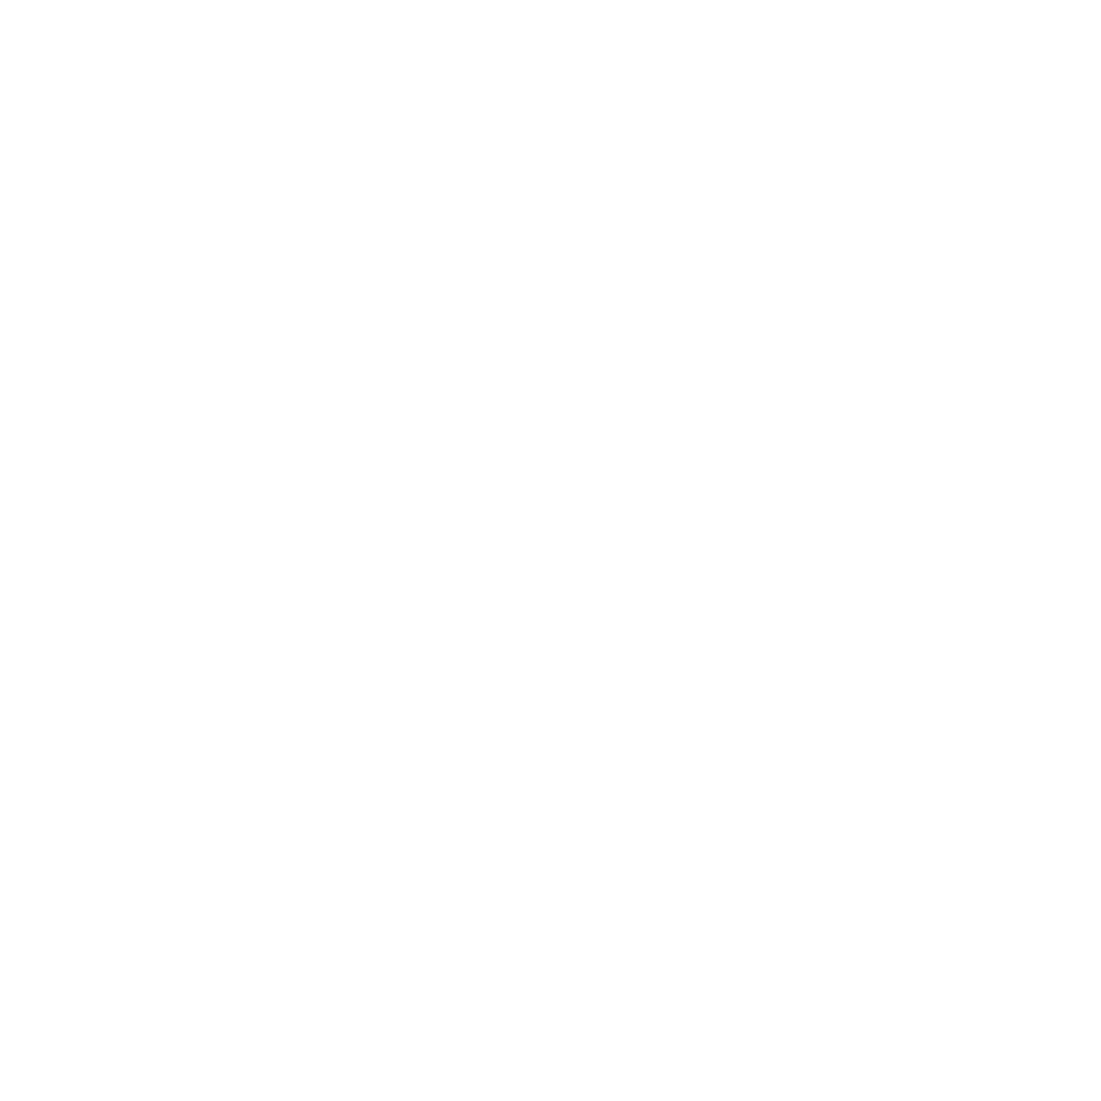

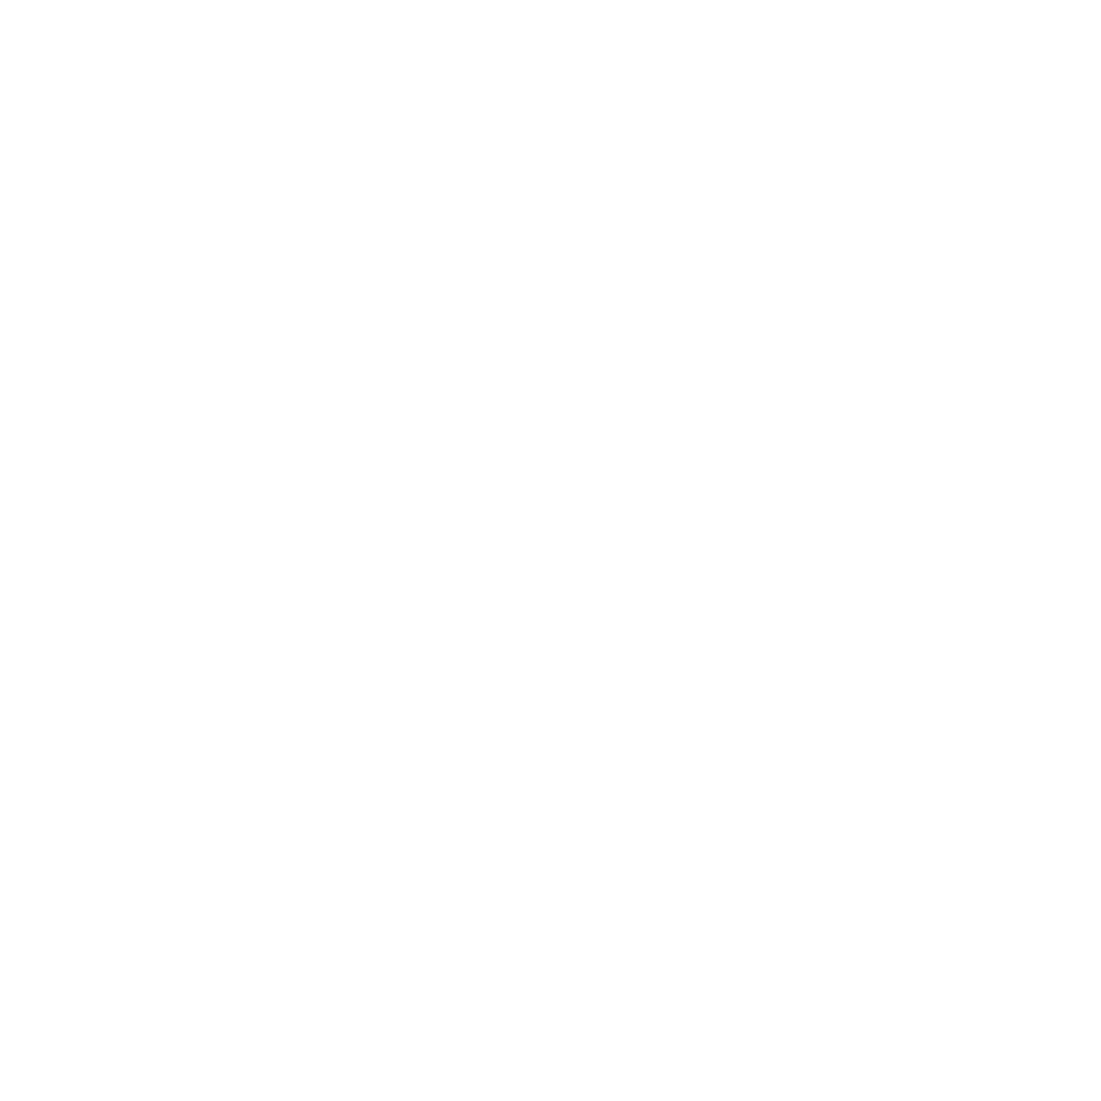

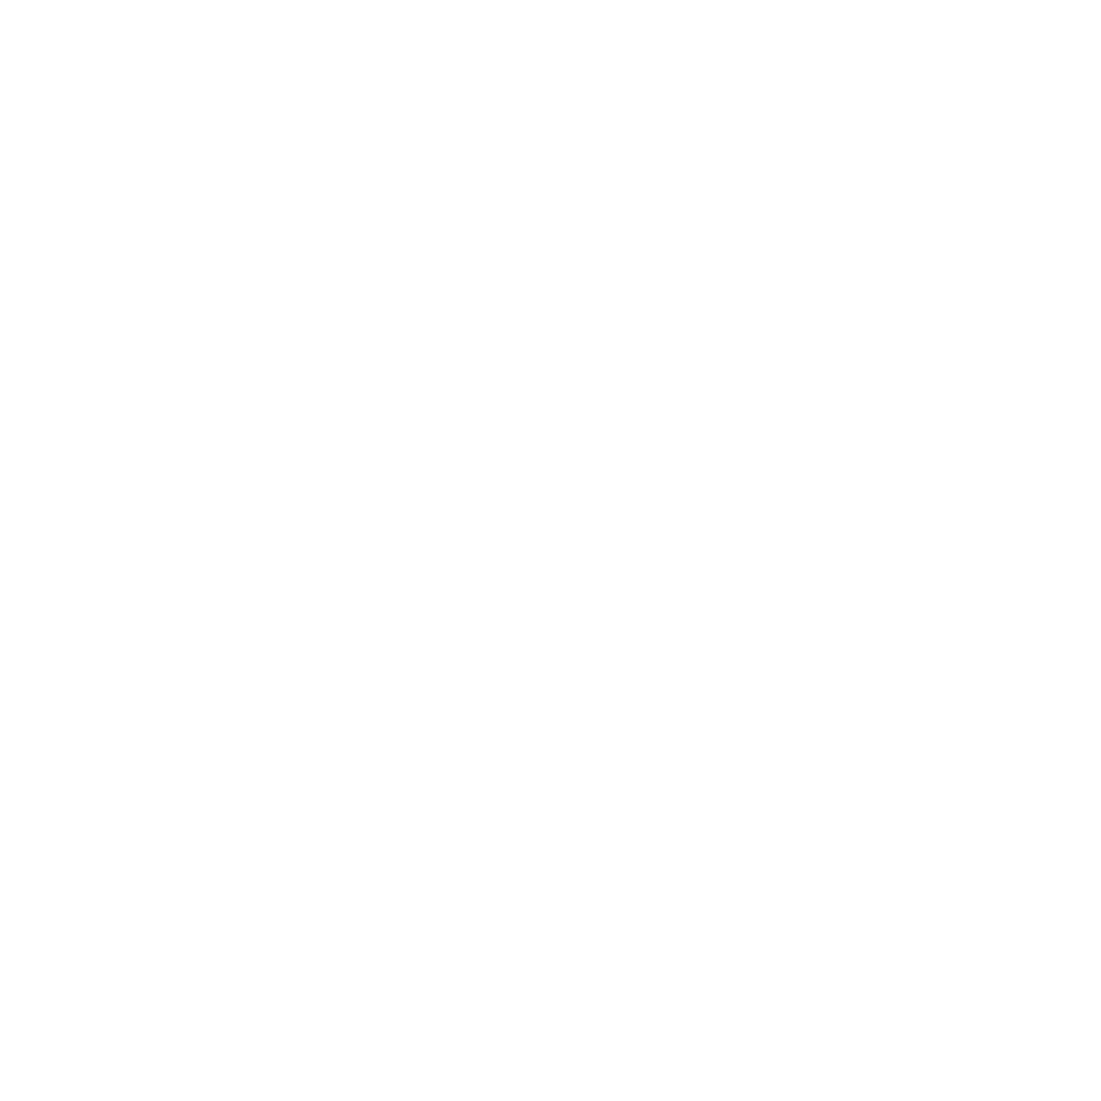

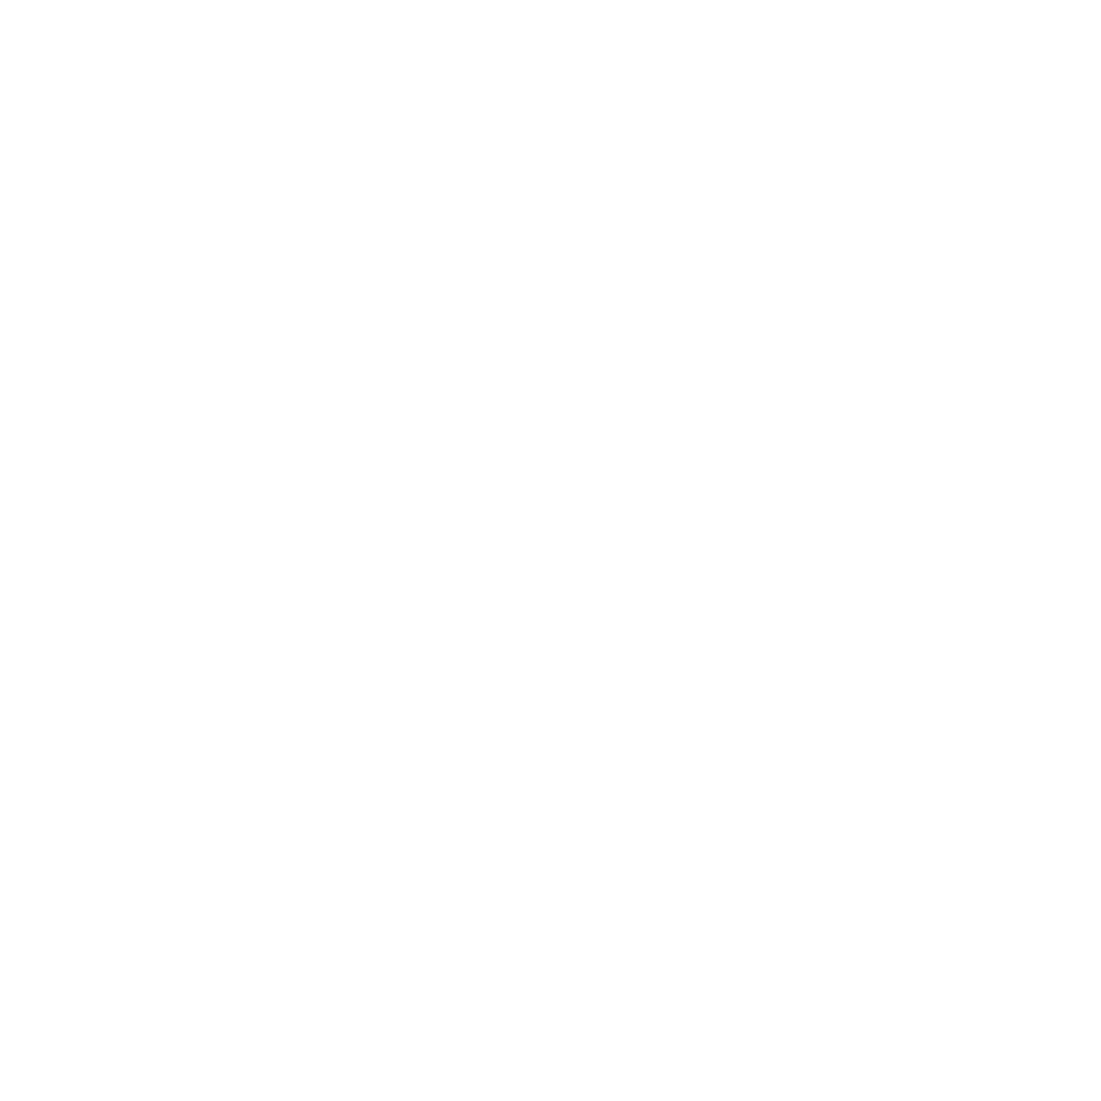

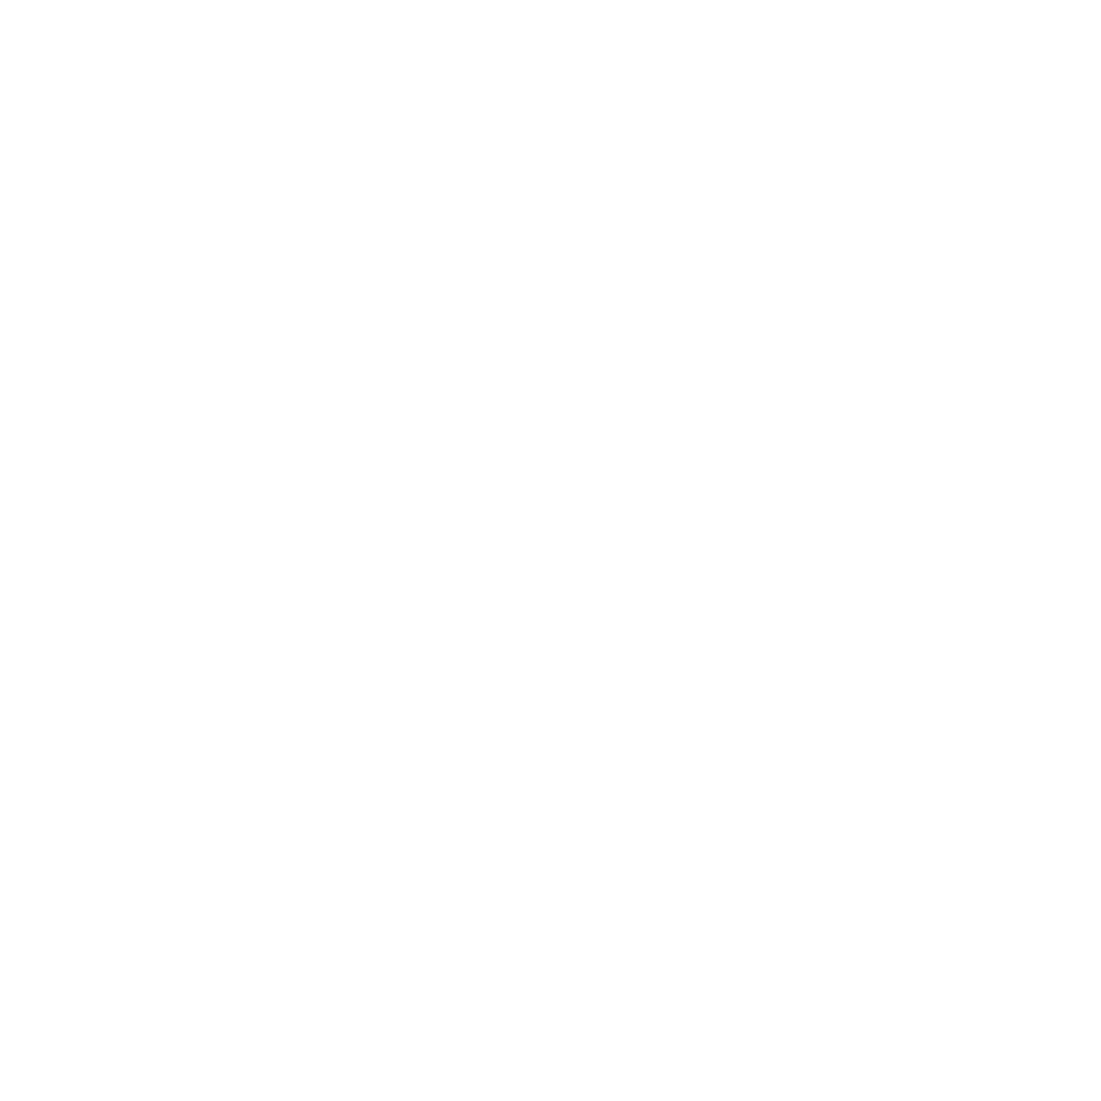

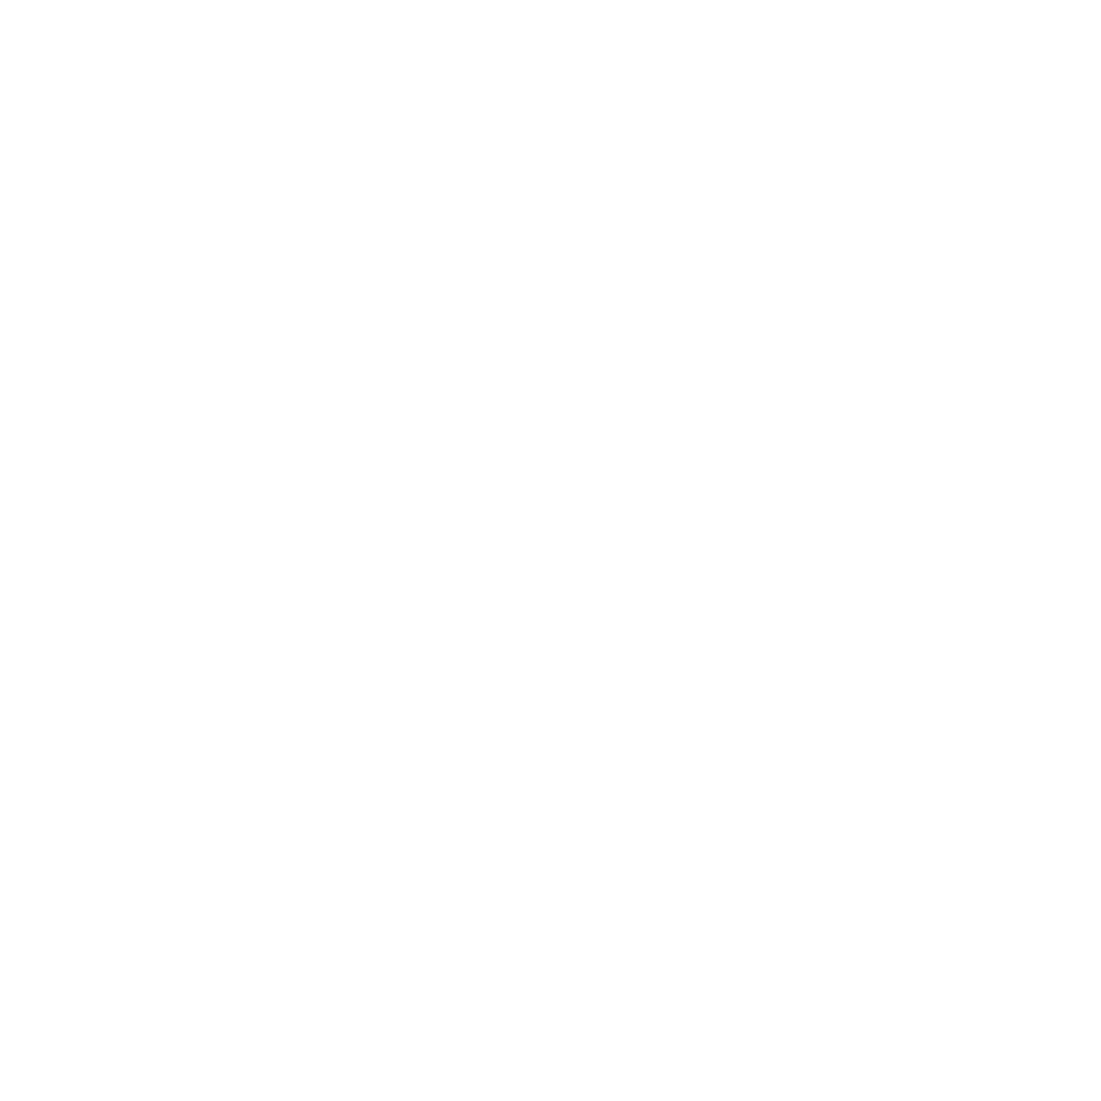

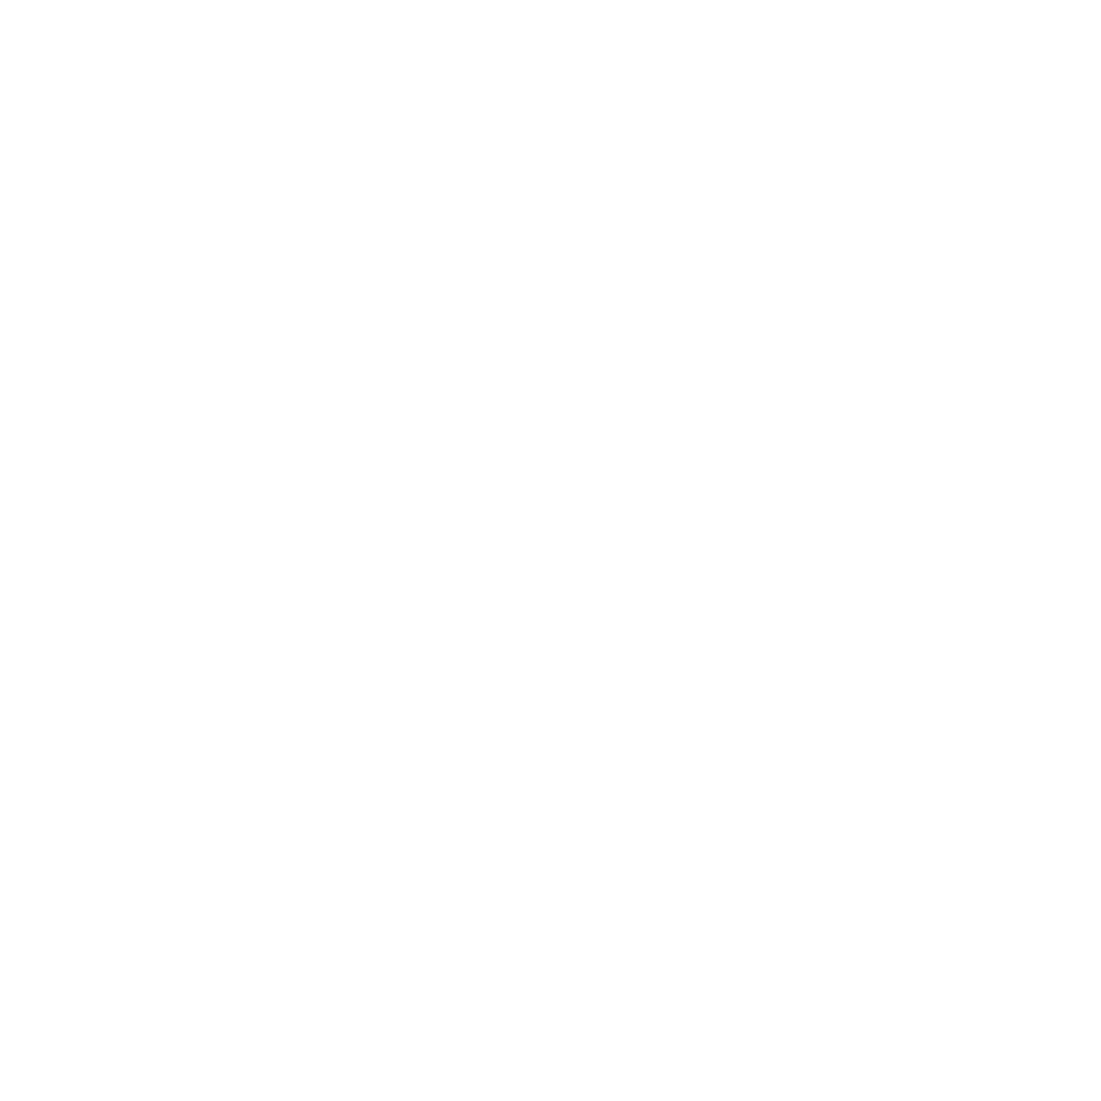

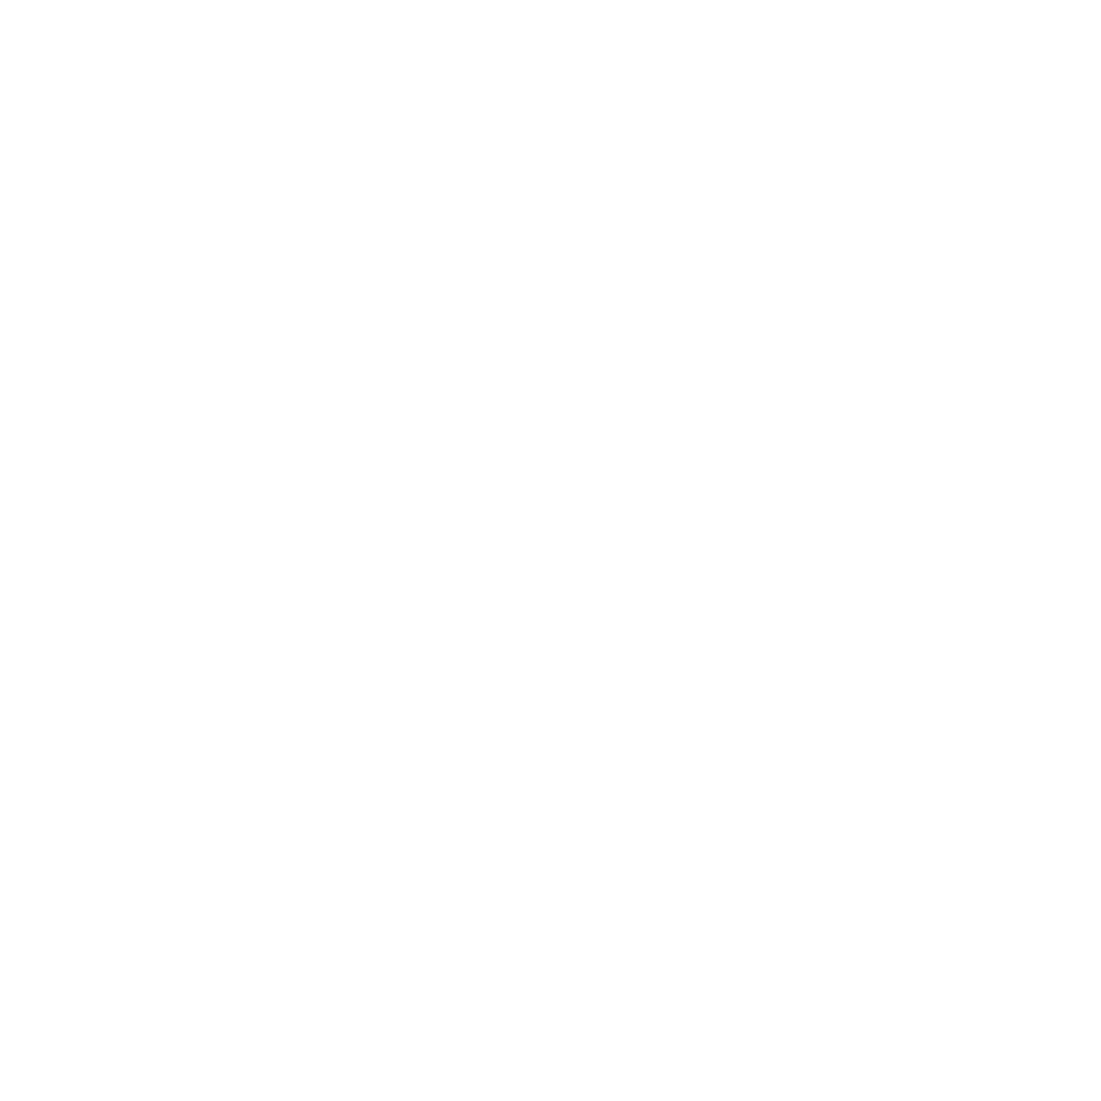

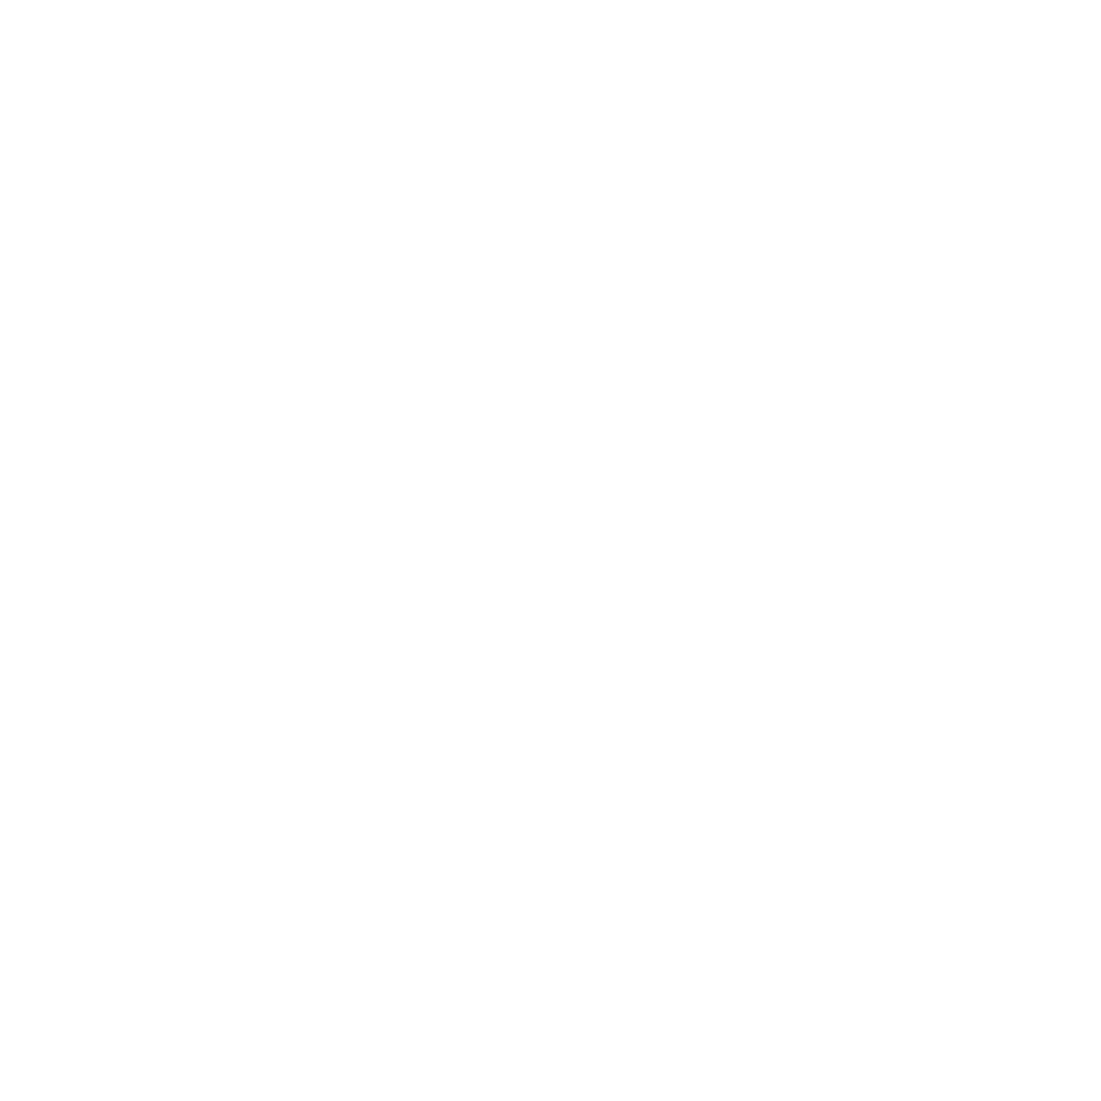

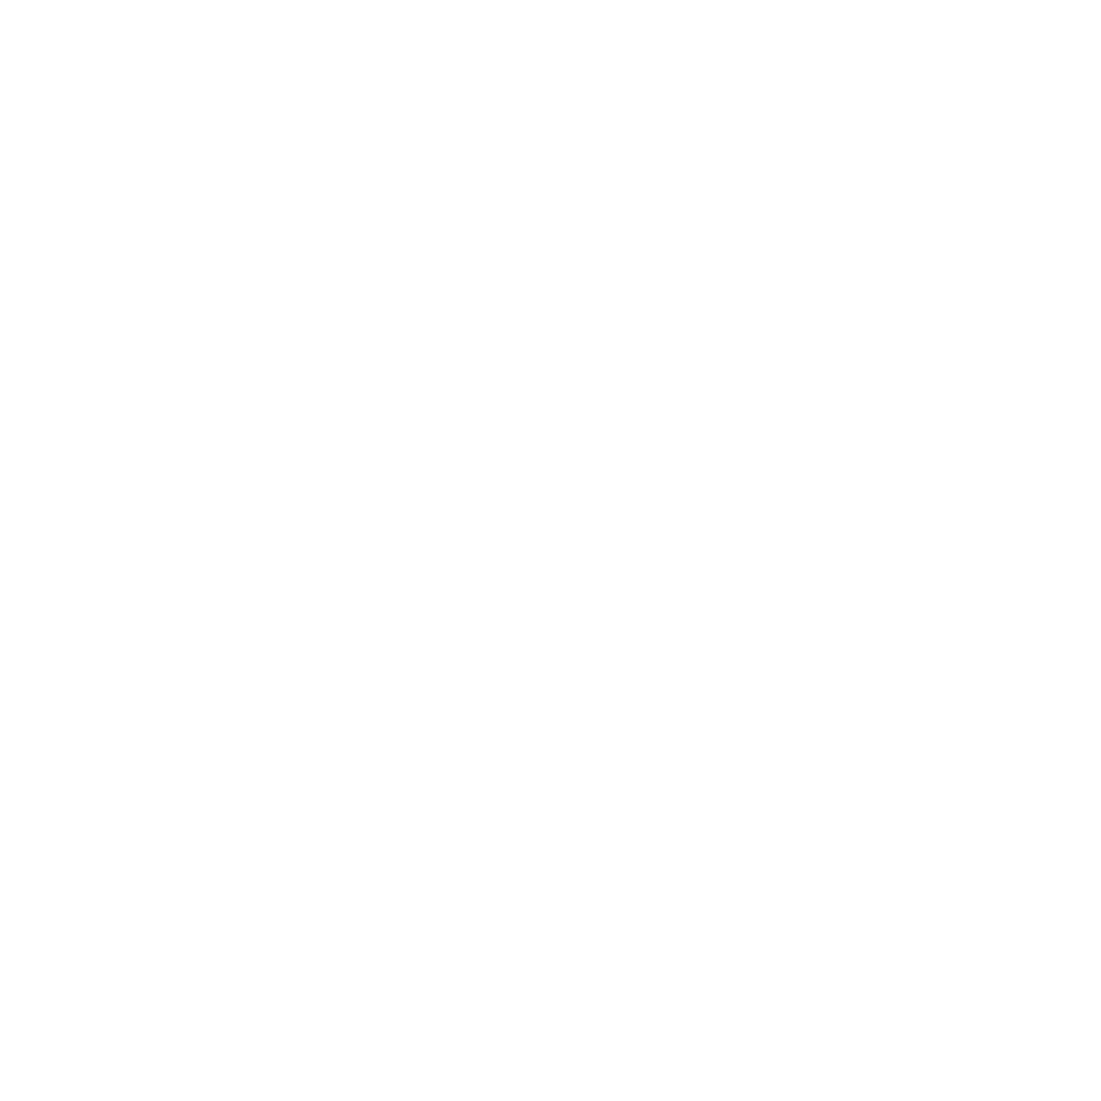

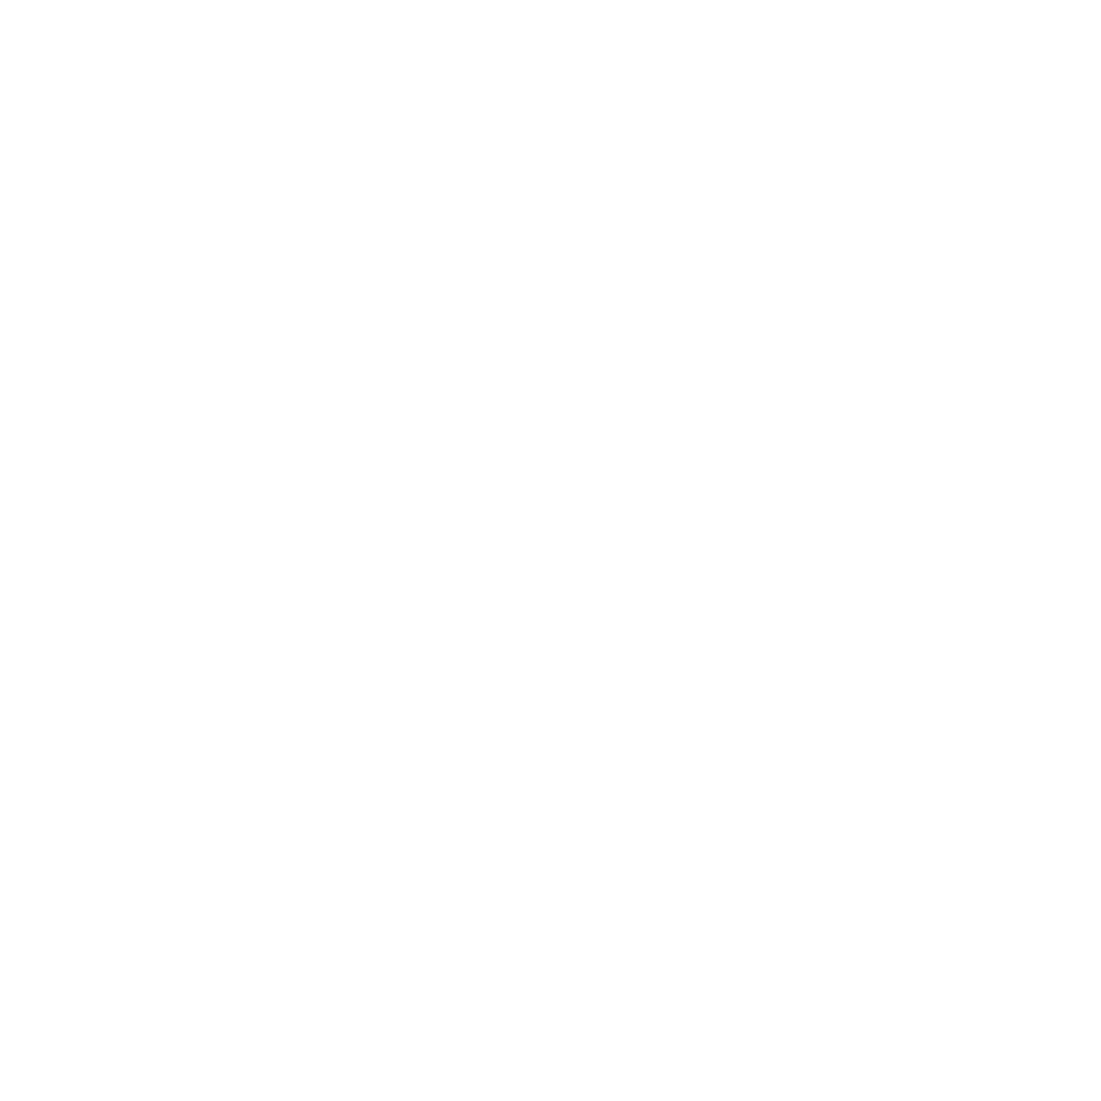

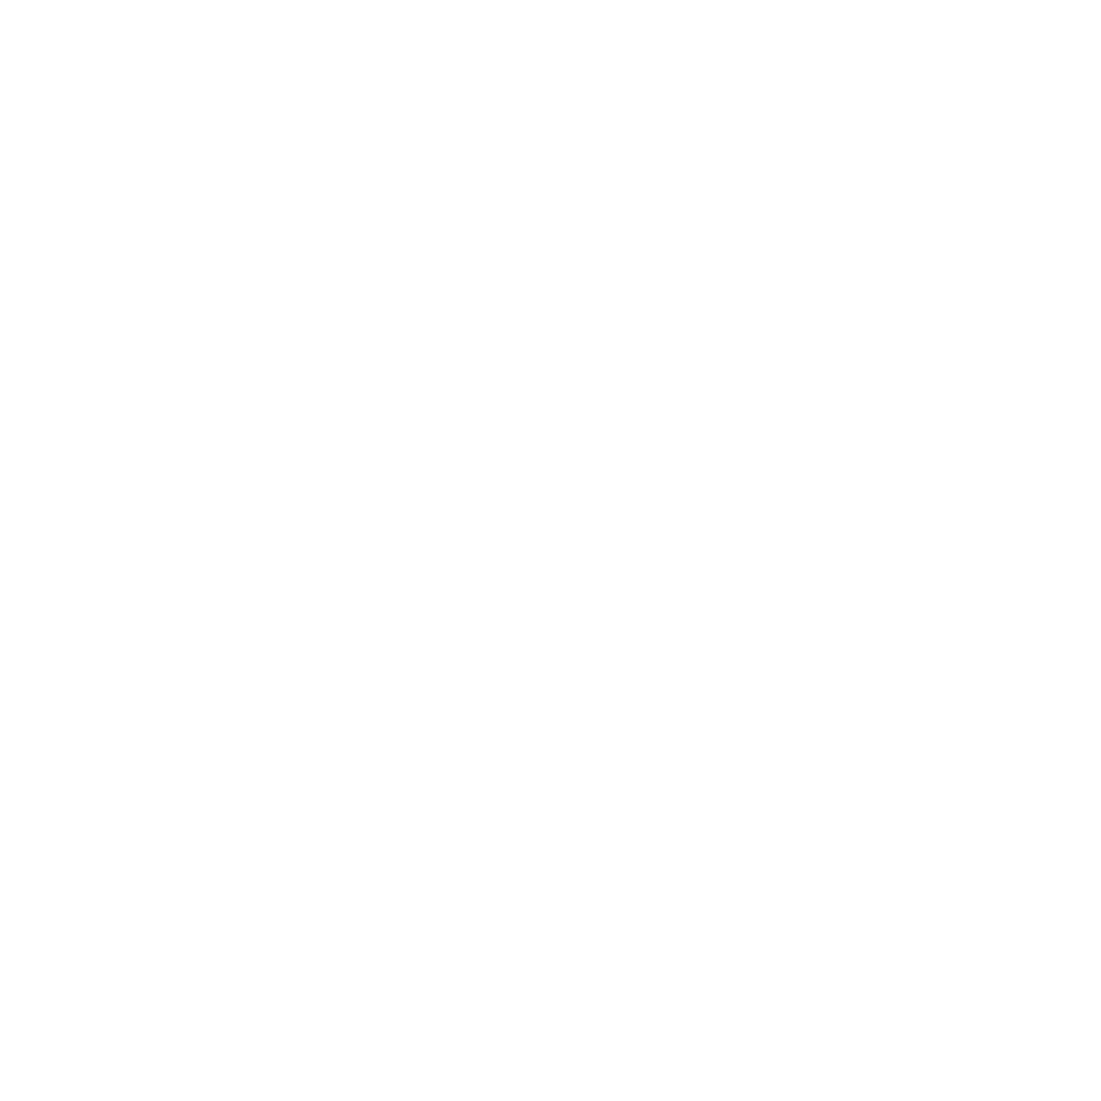

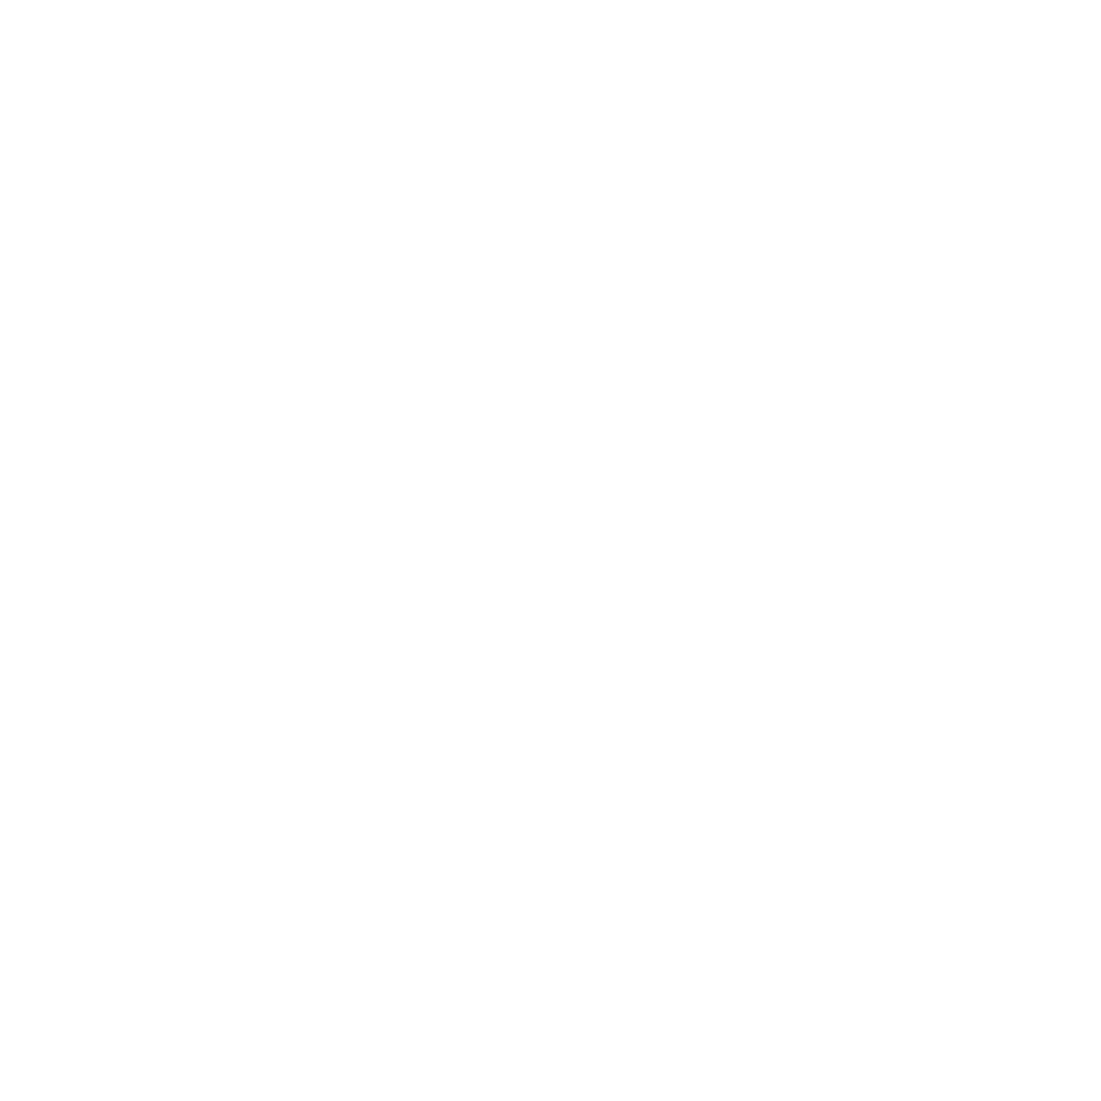

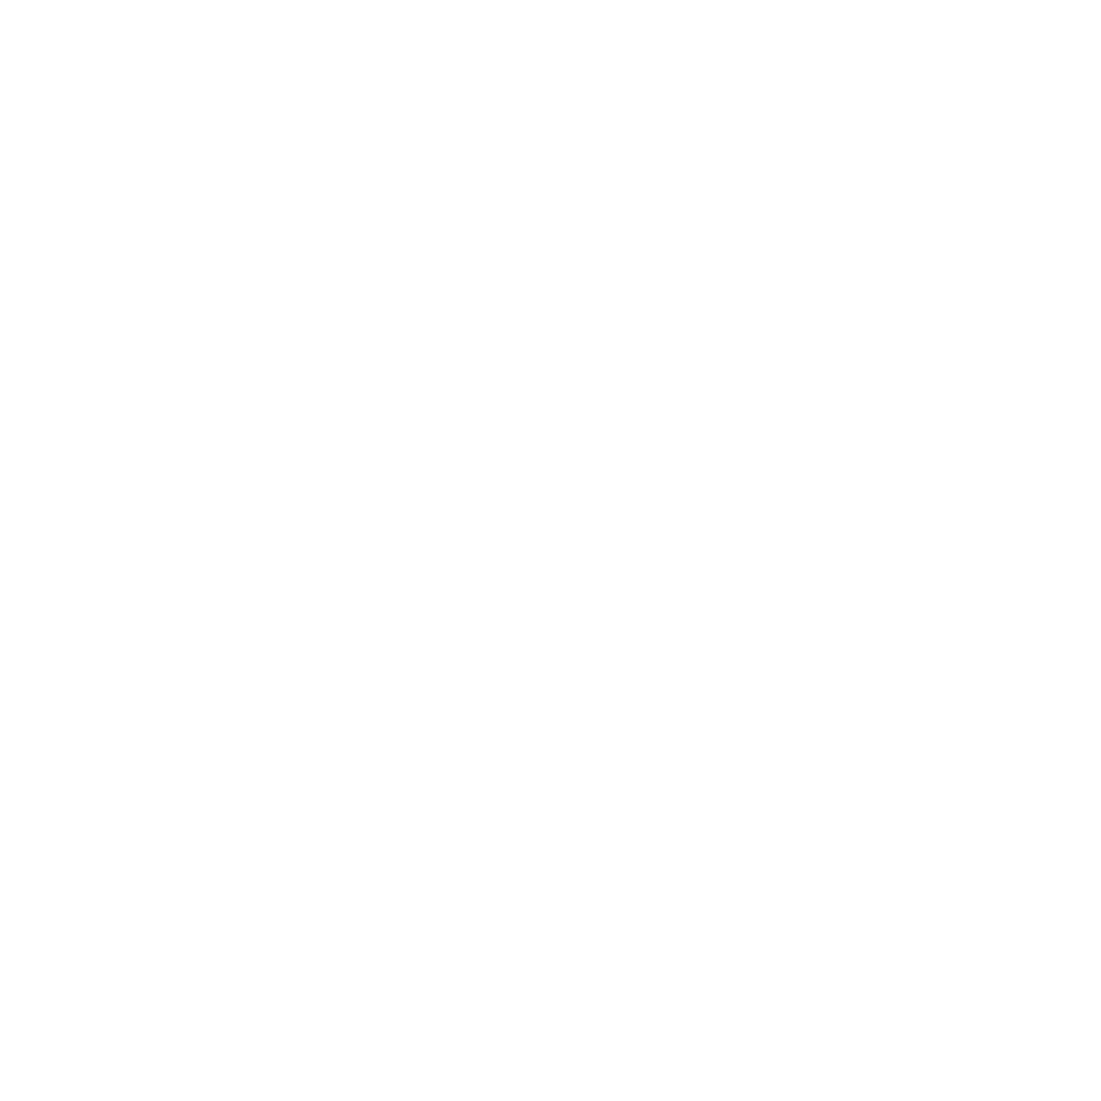

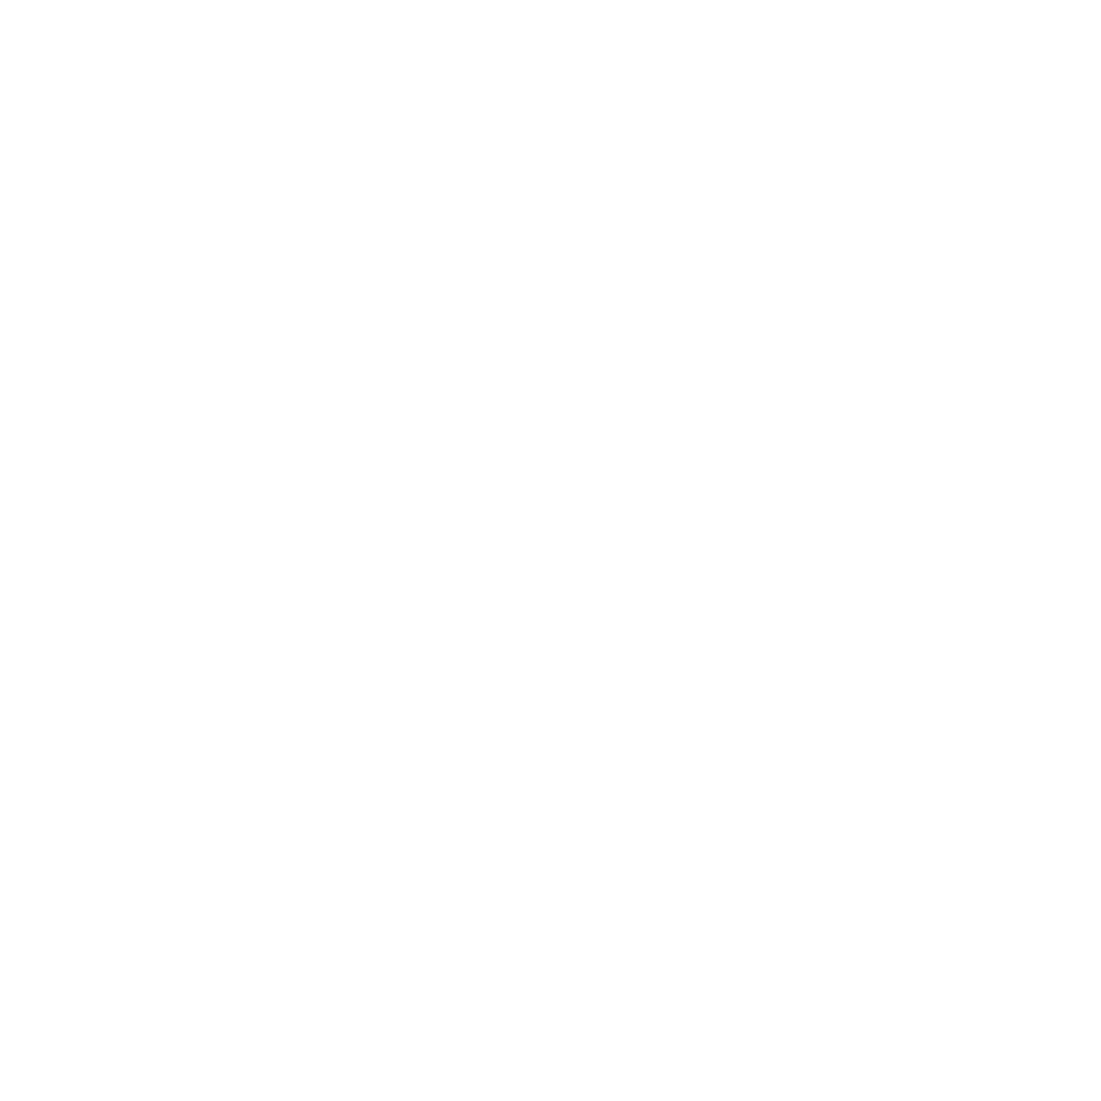

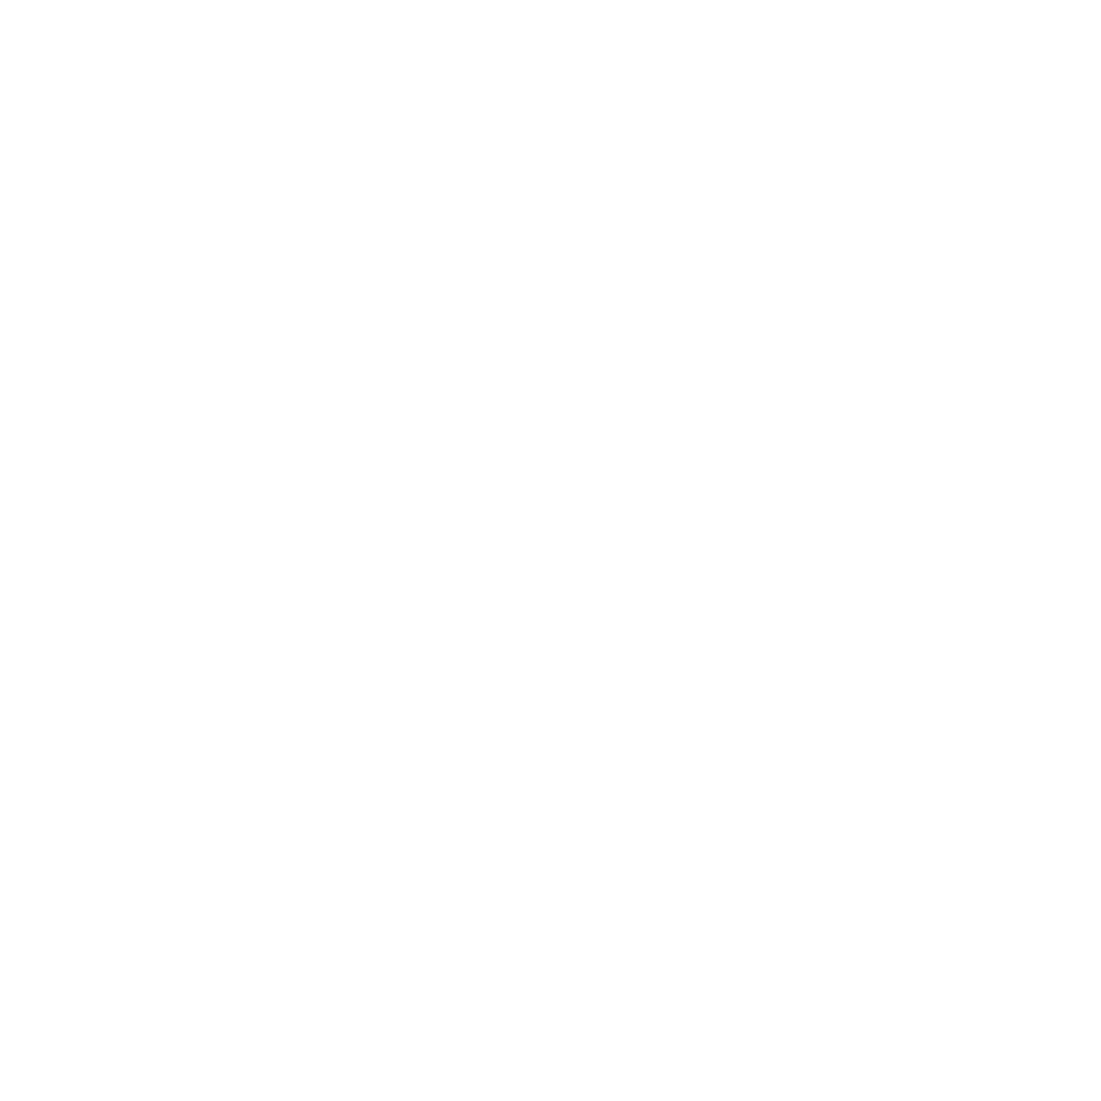

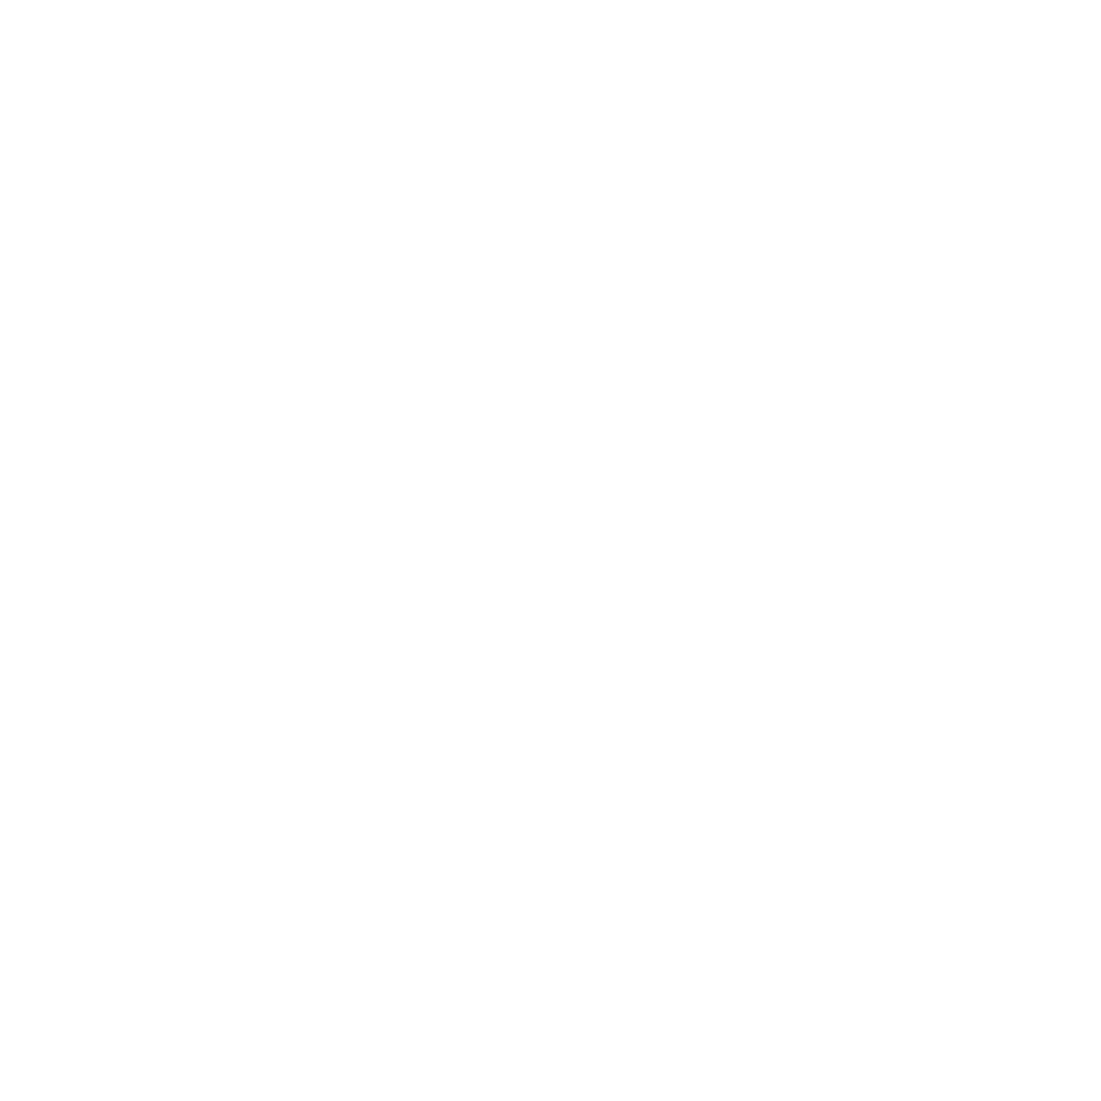

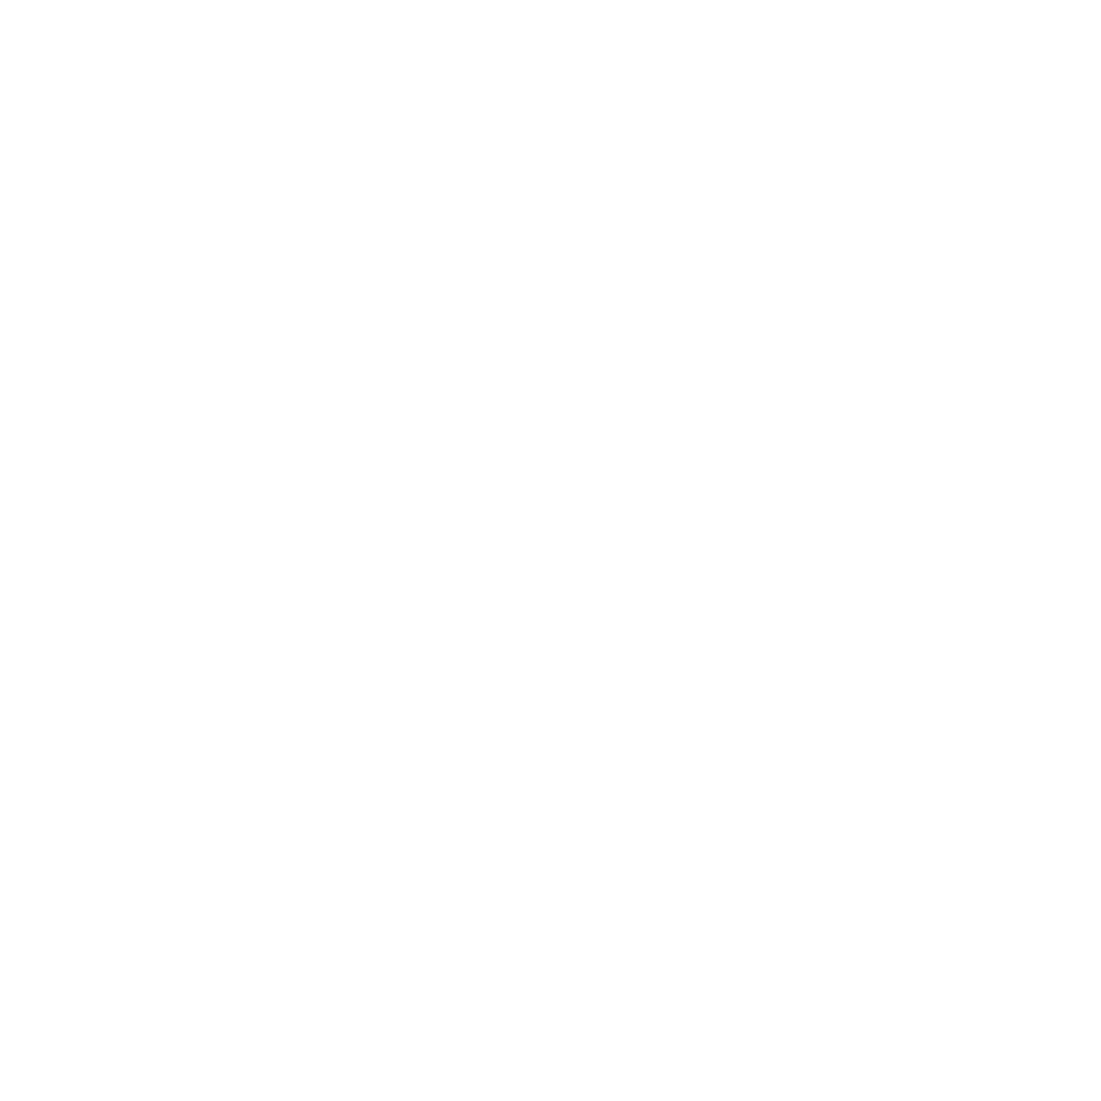

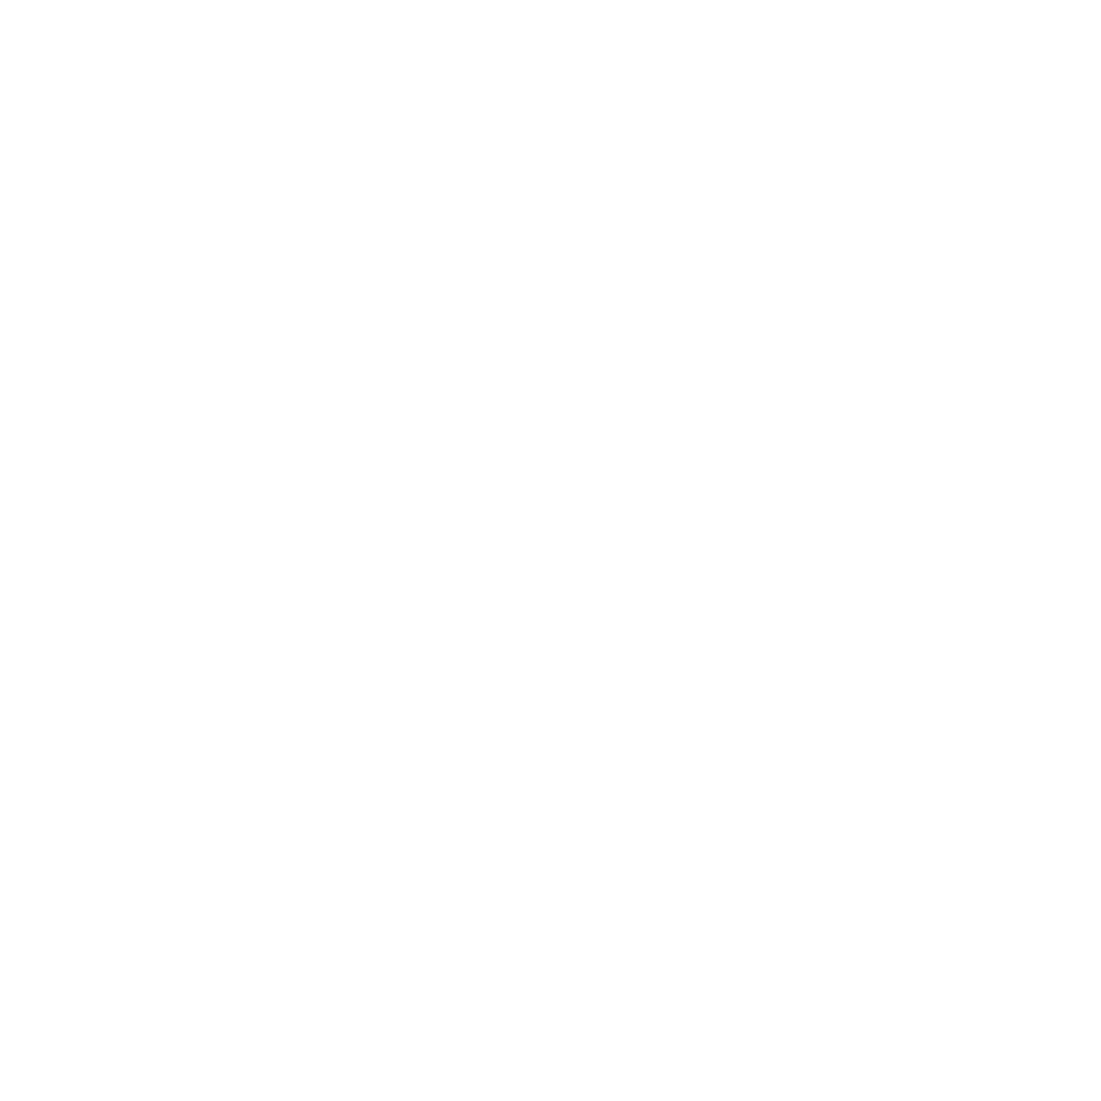

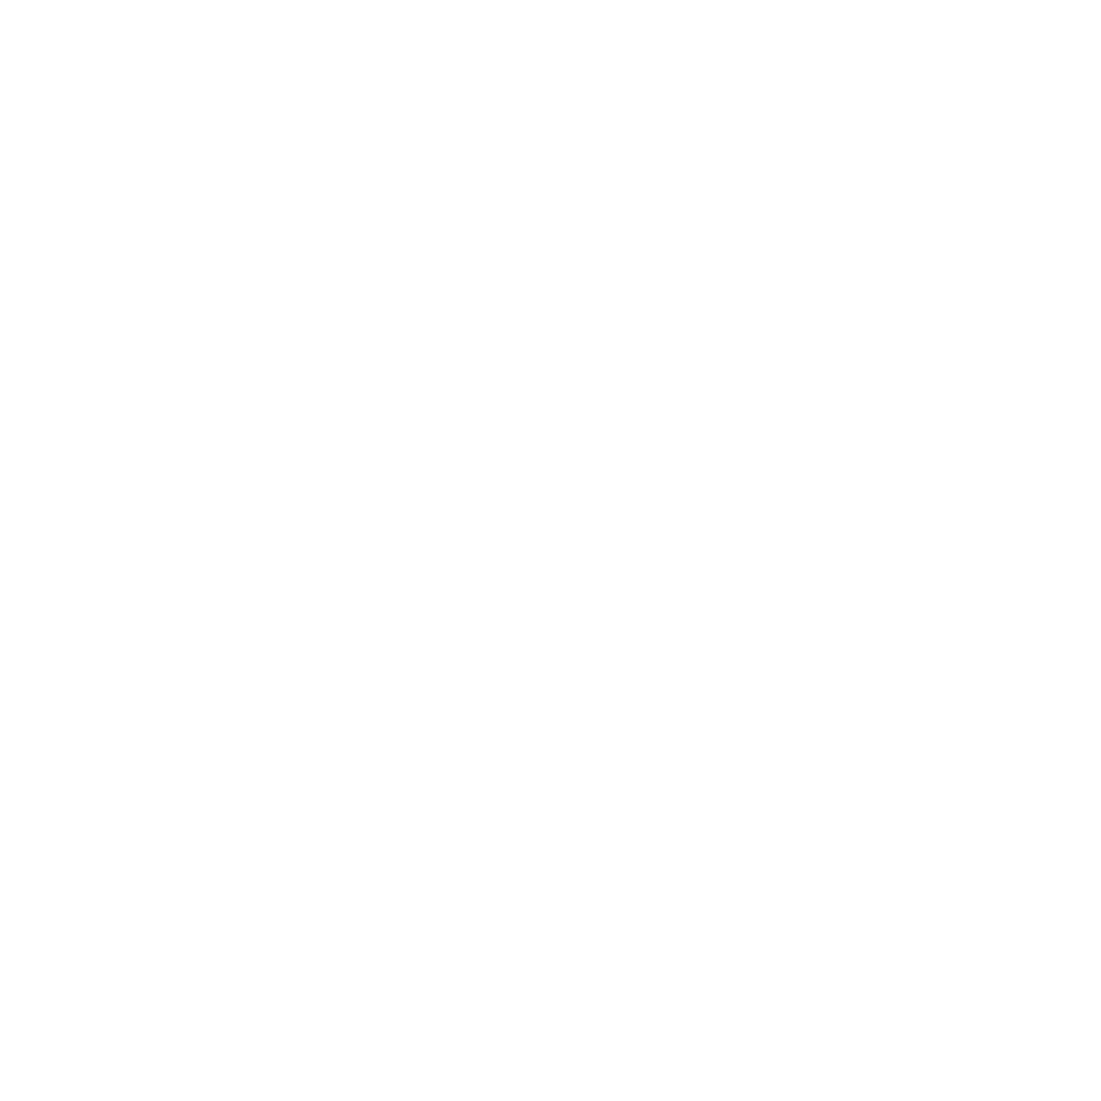

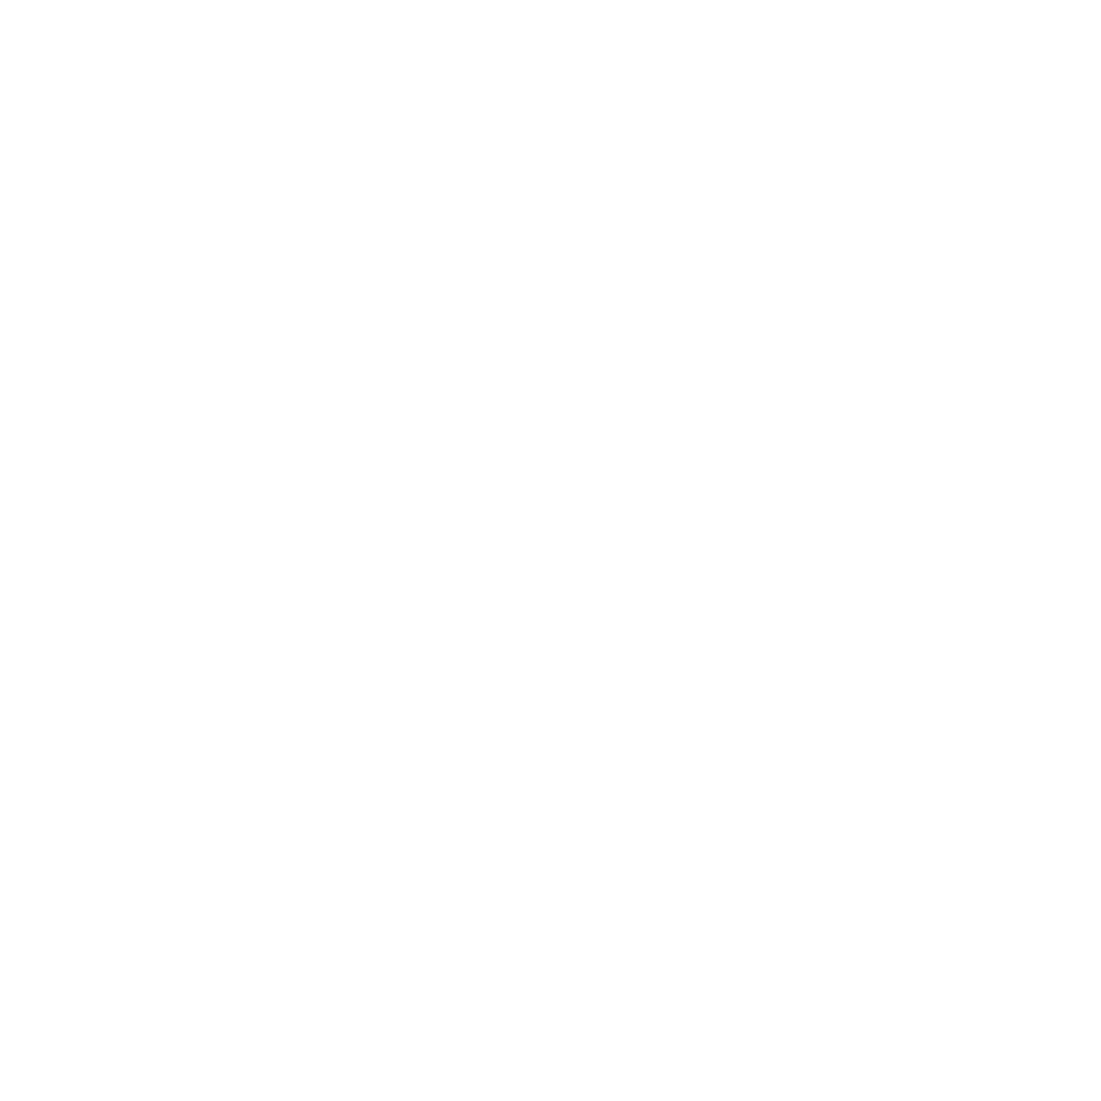

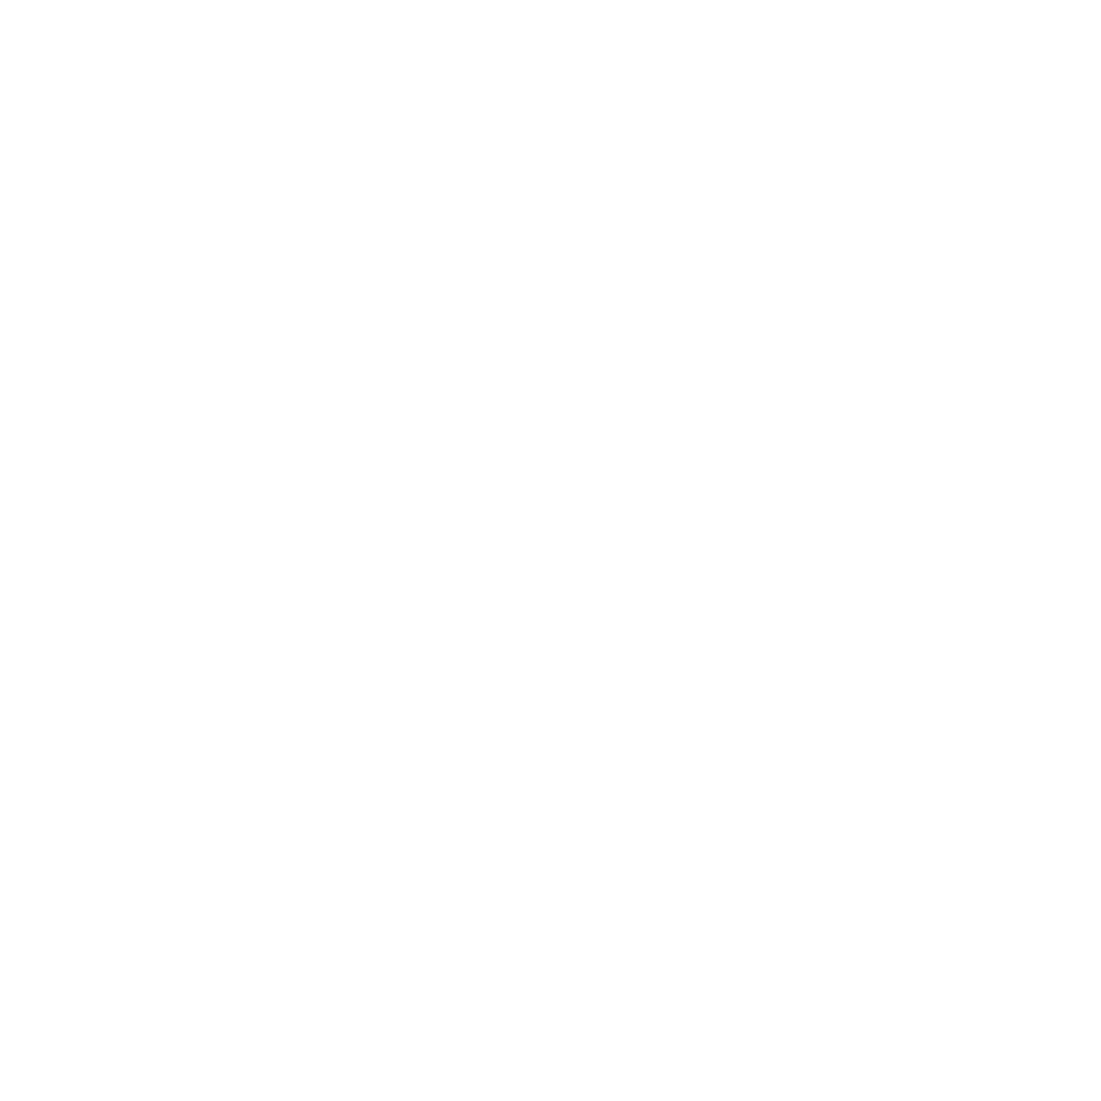

KeyboardInterrupt: 

In [45]:
from matplotlib.animation import ArtistAnimation, PillowWriter, FuncAnimation

imgs = [np.zeros((512, 512))]

savepath = r'/mnt/e/Data/JensenLab/20220608_1214_I1_100000frames_0.1_interferenceTest/data/accumulate_images'

os.chdir(savepath)

for acc in res:
    imgs.append(imgs[len(imgs) - 1] + acc)

print(f'Total number of frames {len(imgs)}')

imgc = imgs[-1].copy()
badpx = imgc > 0.005*imgc.max()
imgc[badpx] = 0
imax = imgc.max()


for i, img in enumerate(imgs):
    # if i != len(imgs) - 1: continue
    imgc = img.copy()
    imgc[badpx] = 0
    plt.figure(figsize=(20, 20))
    plt.axis('off')
    im = plt.imshow(imgc, cmap='gray', vmax=imax)
    ims.append([im])


ani = FuncAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=500)

writer = PillowWriter(fps=20)
ani.save("demo2.gif", writer=writer)

plt.show()
